<h1 style = "text-align:center; font-size:300%">Walmart Store Sales Prediction</h1>

---

## Description (Business Problem):

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.


## About Dataset:
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:
* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13



## Objectives:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales.
- Evaluate the models & compare their respective scores.

---

# Importing Libraries

In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='fivethirtyeight')
%matplotlib inline


---

### 1. Show overall descriptive statistics of your dataset; number of data points, number of descriptive features, type of features, your target feature and its type, descriptive features for different target feature values. (10 points)

In [2]:
data = pd.read_csv('Walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


#### Number of Data points and Descriptive features

In [3]:
original_df = data.copy(deep=True)

print('\n\033[1mInference:\033[0m Number of Data points : {} '.format(data.shape[0]))
print('Number of descriptive features : {} '.format(data.shape[1]))


Inference: Number of Data points : 6435 
Number of descriptive features : 8 


In [4]:
# some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


**Target Feature**

The 'Weekly_Sales' feature represents the sales for each store during a specific week. We will analyze and predict these weekly sales using this dataset.


In [5]:
# Show the data type of the target feature 'Weekly_Sales'
target_feature = 'Weekly_Sales'
target_data_type = data[target_feature].dtype
print(f'Target Feature: {target_feature}')
print(f'Data Type: {target_data_type}')

Target Feature: Weekly_Sales
Data Type: float64


---

### 2. Determine if any features have missing data and what should be done with the missing data. Explain why the decision was made for each feature. If there is no missing data, explain how you would handle missing data and why. Provide supporting visualizations with their analysis. (10 points)

# Data Preperation

## Rename Columns

In [6]:
# rename columns
data.columns  = data.columns.str.lower()
data.rename({'holiday_flag': 'is_holiday'}, axis = 1, inplace = True)
data.columns

Index(['store', 'date', 'weekly_sales', 'is_holiday', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

## Missing Values

In [7]:
#Check for empty elements

nvc = pd.DataFrame(data.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/data.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
store                         0         0.0
date                          0         0.0
weekly_sales                  0         0.0
is_holiday                    0         0.0
temperature                   0         0.0
fuel_price                    0         0.0
cpi                           0         0.0
unemployment                  0         0.0


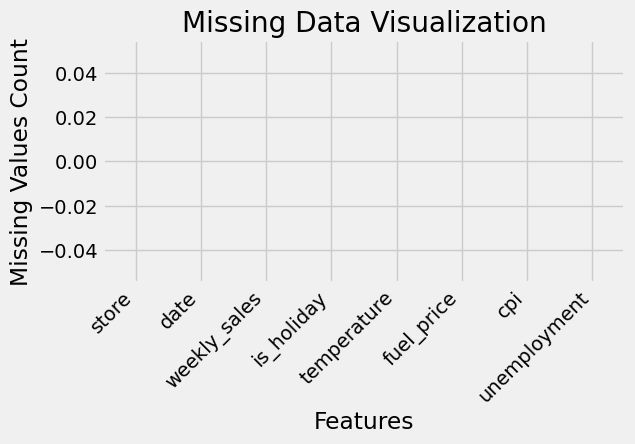

In [8]:
# Create a bar chart to visualize missing data

# Check for missing data
missing_data = data.isnull().sum()

# Create a bar chart to visualize missing data
plt.figure(figsize=(6, 3))
missing_data.plot(kind='bar', color='green')
plt.title('Missing Data Visualization')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**Conclusion:**

The analysis of the dataset reveals that there are no missing data for any of the features. All features, including 'Store,' 'Weekly_Sales,' 'Holiday_Flag,' 'Temperature,' 'Fuel_Price,' 'CPI,' 'Unemployment,' 'weekday,' 'month,' and 'year,' have a count of 0 for missing values. This absence of missing data indicates that the dataset is complete and ready for analysis and modeling without the need for any data imputation or data cleansing steps.

In cases where missing data might have been encountered, standard practices such as imputation, removal of rows with missing data, or advanced techniques would have been considered to handle the missing values appropriately. However, the absence of missing data simplifies the data preparation process and allows for a more straightforward analysis and modeling of the dataset.

## Duplicate Values

In [9]:
# Check Duplicate Values
data.duplicated().sum()

0

**Conclusion:**

- The dataset doesn't have any duplicate values

## Feature Engineering

In [10]:
# this function is to get season according to quarter column

def get_season(quarter):

    if quarter == 1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Autumn'

In [11]:
# correct data format of the 'date' column
data['date'] = pd.to_datetime(data['date'], format = "%d-%m-%Y")

# Create a new column "year" containing the year
data['year'] = data['date'].dt.year

# Create a new column "quarter" containing the season number
data['quarter'] = data['date'].dt.quarter

# Create a new column "season" containing the season
data['season'] = data['quarter'].apply(get_season)

# Create a new column "month" containing the month number
data['month'] = data['date'].dt.month

# Create a new column "month_name" containing the month names
data['month_name'] = data['date'].dt.month_name()

# Create a new column "week" containing the week number
data['week'] = data['date'].dt.isocalendar().week

# Create a new column "day_of_week" containing the day names
data['day_of_week'] = data['date'].dt.day_name()

data['week'] = data['week'].astype('int32')
# display a data sample
data.head()

,store,date,weekly_sales,is_holiday,temperature,fuel_price,cpi,unemployment,year,quarter,season,month,month_name,week,day_of_week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,1,Winter,2,February,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,1,Winter,2,February,6,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,1,Winter,2,February,7,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,1,Winter,2,February,8,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,1,Winter,3,March,9,Friday


In [12]:
#number of descriptive features, type of features

target = 'Weekly_Sales'

features = [i for i in data.columns if i not in [target]]

nu = data[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(data[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 7 numerical & 8 categorical features.


A feature in the dataset is categorized as 'categorical' if the number of its unique values does not exceed 45. This threshold suggests that the feature likely encompasses a defined set of categories.

Conversely, a feature is deemed 'numerical' if it presents more than 45 unique values, which typically corresponds to a continuous variable that can manifest a broad spectrum of values.

Based on this heuristic approach, the dataset in question consists of:

6 numerical features: temperature, fuel_price, cpi, unemployment, year, quarter (assuming that 'quarter' has more than 45 unique values, which is unlikely in this context and might need reevaluation).

7 categorical features: store, is_holiday, season, month, month_name, week, day_of_week (considering 'week' as categorical despite possibly having more than 45 unique values over several years).

This method of classification relies on an arbitrary cutoff and may not always capture the true essence of the features. For instance, year and store could be numerically interpreted due to their quantitative nature. On the other hand, week and month, although they may surpass the threshold of 45 unique values when aggregating data across multiple years, are inherently categorical as they represent specific segments of time.


---

# Exploratory Data Analysis (EDA)

### 3. Explore your features further in their distributions and plot their bar and box plots. How are individual features distributed? Show outliers for each feature. Do you think any of the outliers may impact your analysis? Why? Provide supporting visualizations with their analysis. (20 points)

#### Descriptive fearures for different target feature values

* Univariate Analysis
* Bi-variate Analysis
* Time Series Analysis

## Univariate Analysis

### 1. Numerical Features

- weekly_sales
- temperature
- fuel_price
- unemployment
- cpi

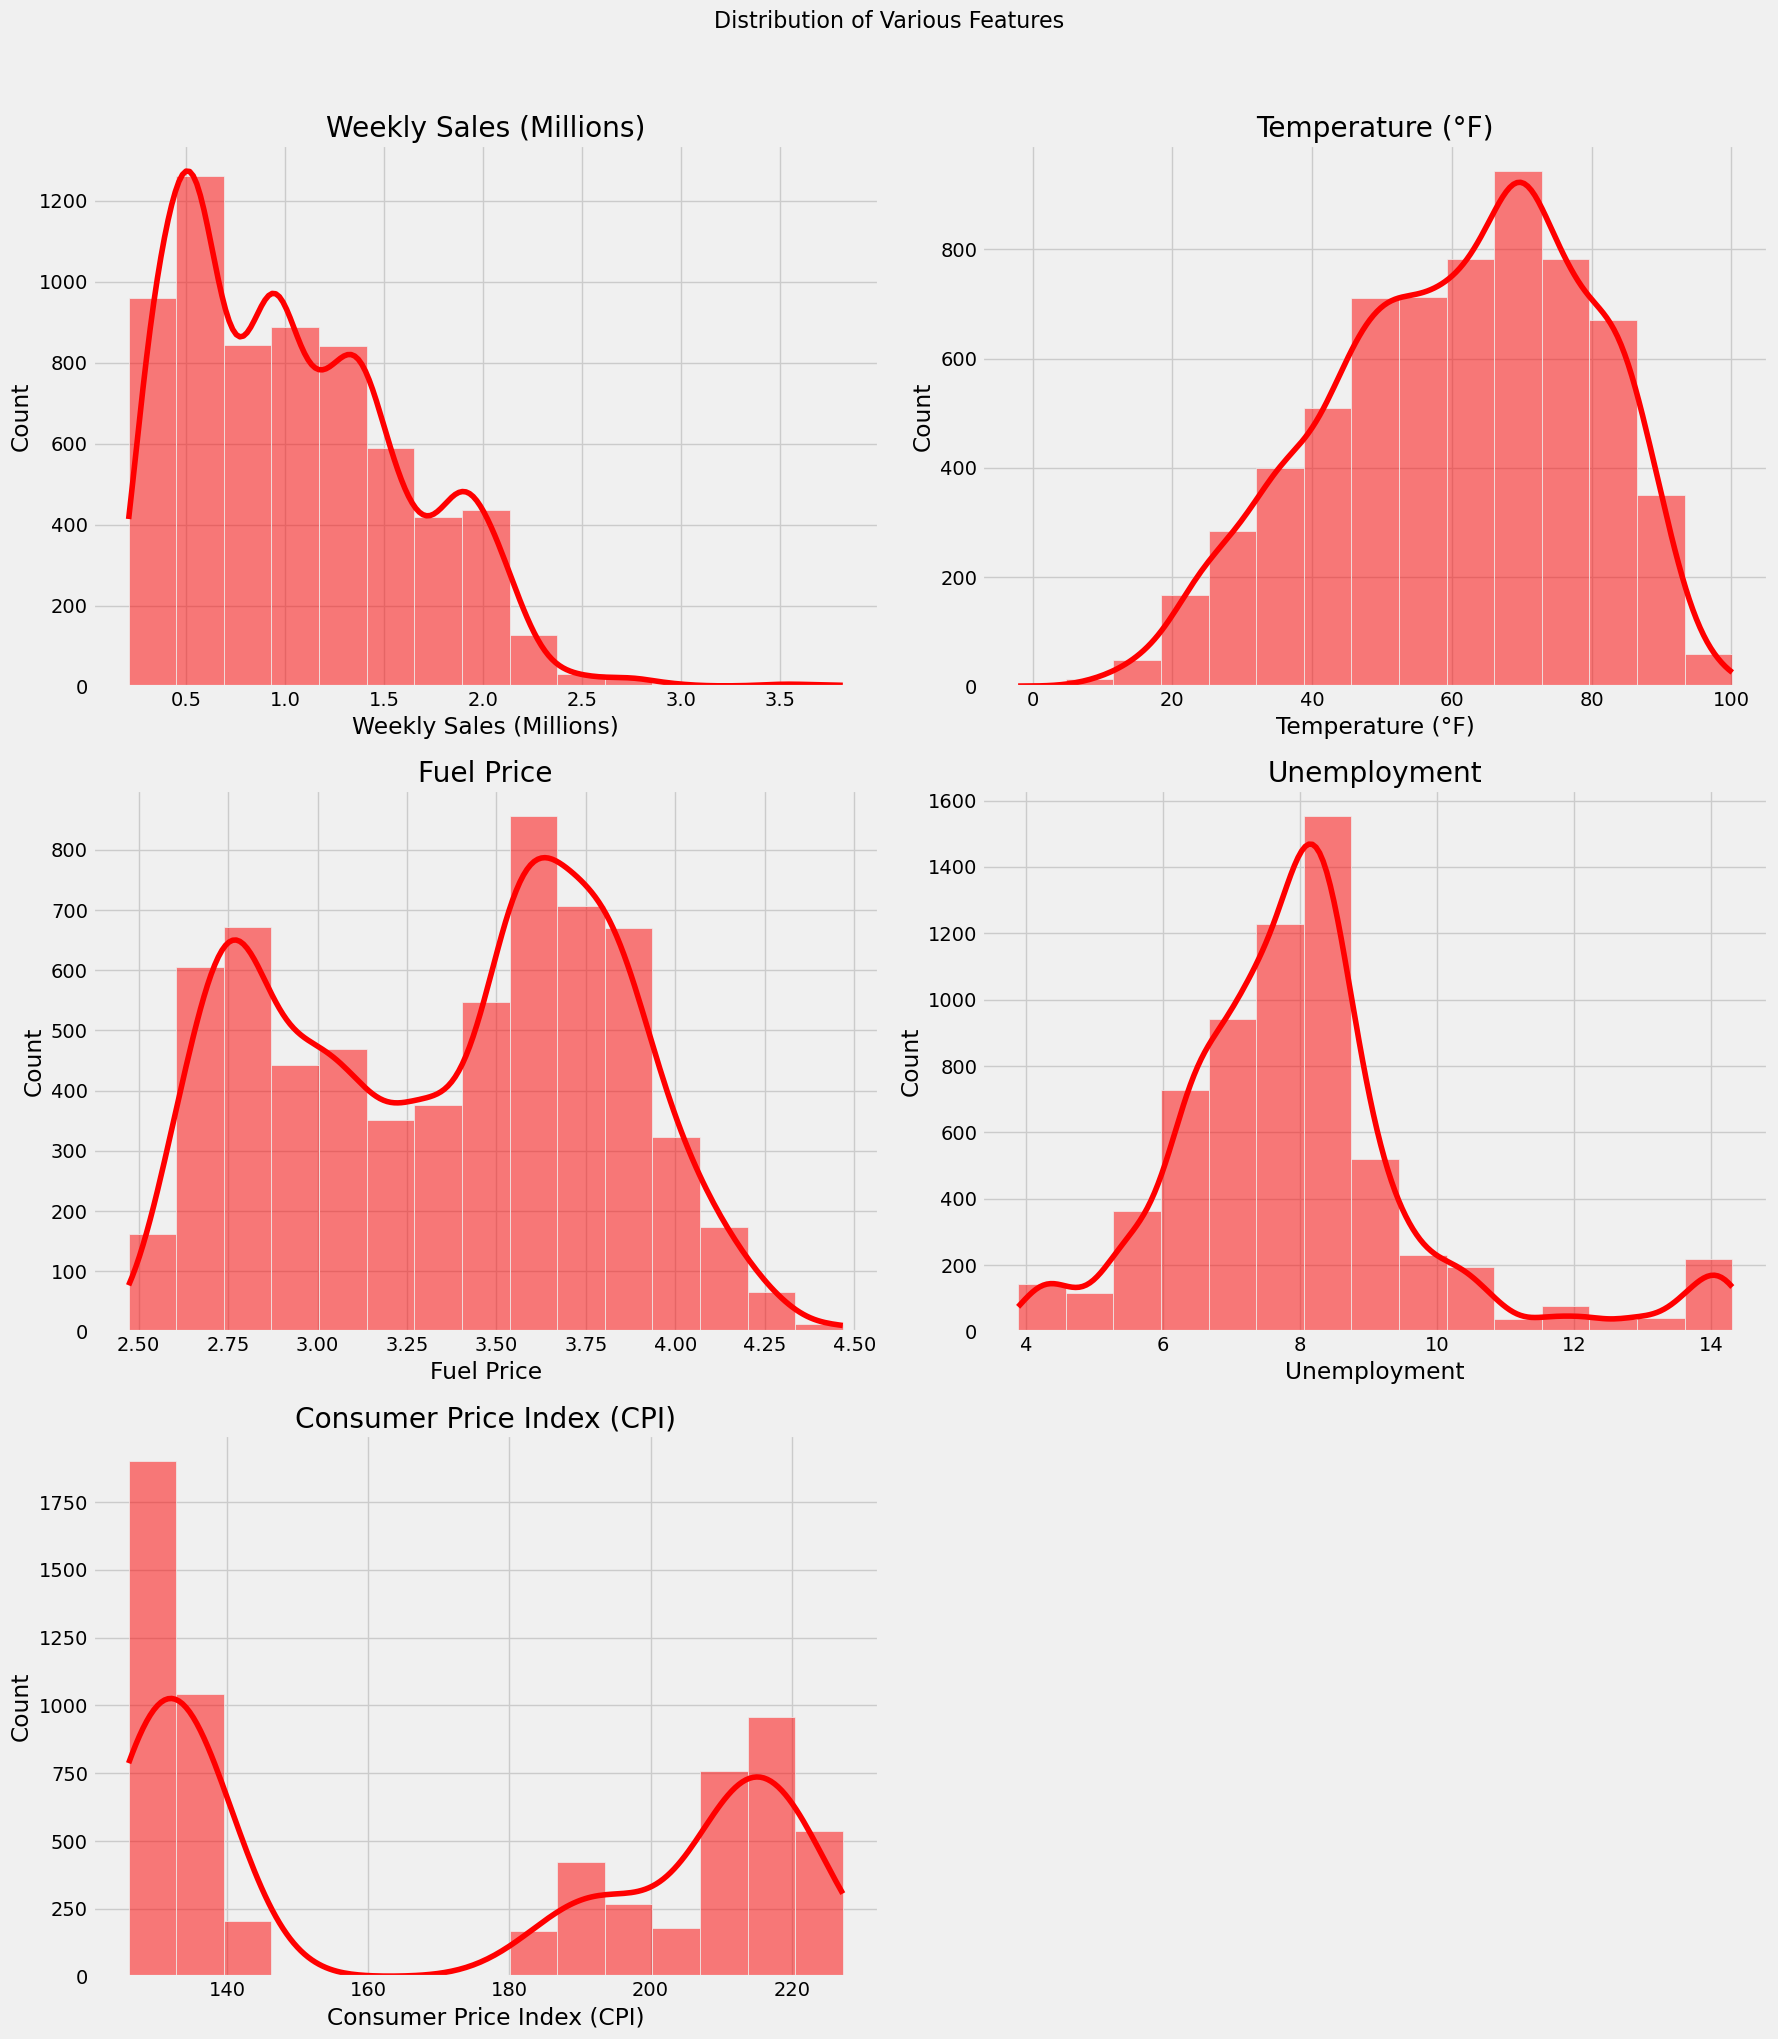

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust 'weekly_sales' column to represent values in millions
data['weekly_sales_millions'] = data['weekly_sales'] / 1e6

# Define the columns with the updated 'weekly_sales_millions'
columns = ['weekly_sales_millions', 'temperature', 'fuel_price', 'unemployment', 'cpi']

# Define titles for individual plots
titles = {
    'weekly_sales_millions': 'Weekly Sales (Millions)',
    'temperature': 'Temperature (°F)',
    'fuel_price': 'Fuel Price',
    'unemployment': 'Unemployment',
    'cpi': 'Consumer Price Index (CPI)'
}

plt.figure(figsize=(18, 20))

# Create a subplot for each column and set individual titles
for i, col in enumerate(columns):
    ax = plt.subplot(3, 2, i+1)
    sns.histplot(data=data, x=col, kde=True, bins=15, color='r')
    plt.xlabel(titles[col])  # Set the x-label to the appropriate title
    ax.set_title(titles[col])  # Set the title for each subplot

# Set the main title for the figure
plt.suptitle('Distribution of Various Features', fontsize=16, y=1.02)

# Adjust layout for spacing
plt.tight_layout()

# Show the plot
plt.show()


**Conclusion:**

- The distribution of Weekly_Sales is right skewed, this is normal because the weekly sales may be high in some time.
- Temperature and Unemployment have normal distribution.
- CPI and Fuel_Price have bimodal distribution.

### 2. categorical Features

- is_holiday
- year
- season
- month_name
- day_of_week

### 2.1. is_holiday

In [14]:
d = data['is_holiday'].value_counts()
d

0    5985
1     450
Name: is_holiday, dtype: int64

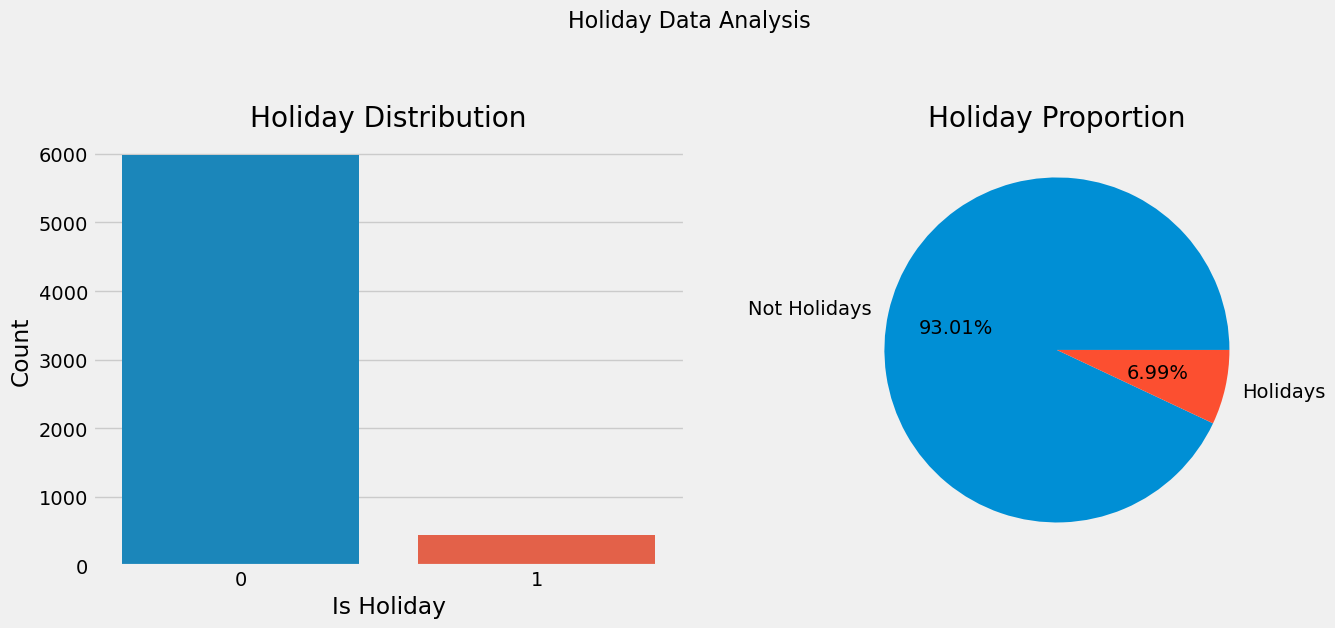

In [15]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Countplot for 'is_holiday'
sns.countplot(data=data, x='is_holiday', ax=ax[0])
ax[0].set_title('Holiday Distribution')  # Title for the countplot
ax[0].set_xlabel('Is Holiday')  # Set the x-axis label
ax[0].set_ylabel('Count')  # Set the y-axis label

# Second subplot: Pie chart for 'is_holiday'
ax[1].pie(data['is_holiday'].value_counts().values,
          labels=['Not Holidays', 'Holidays'],
          autopct='%1.2f%%')
ax[1].set_title('Holiday Proportion')  # Title for the pie chart

# Main title for the entire figure
fig.suptitle('Holiday Data Analysis', fontsize=16, y=1.05)

# Adjust layout for spacing
plt.tight_layout()

# Show the plot
plt.show()


**Conclusion:**

- Weeks of no holiday are the most frequent than days of holiday in the dataset with a percentage of 93 % and this is normal.

### 2.2. year

In [16]:
data['year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: year, dtype: int64

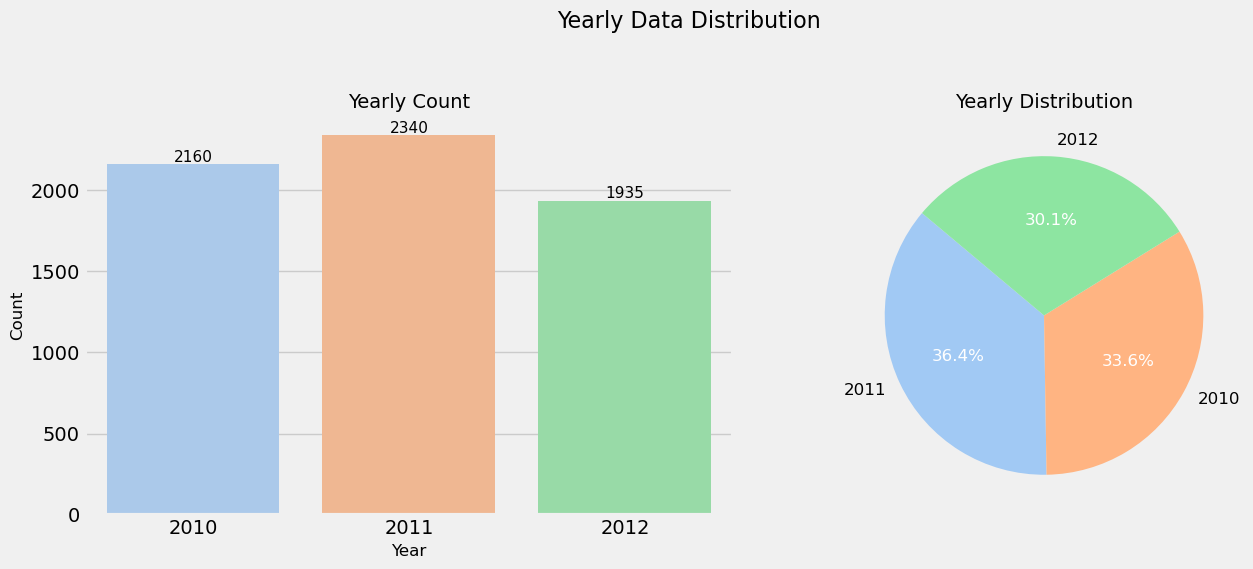

In [17]:

# Enhance the data visualization with an intuitive color palette
sns.set_palette('pastel')  # Setting the color palette for the plots

# Assuming 'data' is your DataFrame and it has a 'year' column
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Countplot for 'year'
countplot = sns.countplot(data=data, x='year', ax=ax[0])
ax[0].set_title('Yearly Count', fontsize=14)  # Title for the countplot
ax[0].set_xlabel('Year', fontsize=12)  # Set the x-axis label
ax[0].set_ylabel('Count', fontsize=12)  # Set the y-axis label

# Beautify the count plot with clear labeling and design
for p in countplot.patches:
    countplot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Second subplot: Pie chart for 'year'
pie_values = data['year'].value_counts().values
pie_labels = data['year'].value_counts().index
wedges, texts, autotexts = ax[1].pie(pie_values, labels=pie_labels, autopct='%1.1f%%', startangle=140)

# Enhance text properties and aesthetics in the pie chart
plt.setp(texts, size=12)
plt.setp(autotexts, size=12, color='white')
ax[1].set_title('Yearly Distribution', fontsize=14)  # Title for the pie chart

# Main title for the entire figure
fig.suptitle('Yearly Data Distribution', fontsize=16)

# Adjust layout for spacing to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot with clear titles and engaging color palette
plt.show()


**Conclusion:**

- 2011 is the most frequent in the dataset because most of the weekly sales were recorded during this year.

### 2.3. season

In [18]:
data['season'].value_counts()

Summer    1800
Spring    1755
Winter    1485
Autumn    1395
Name: season, dtype: int64

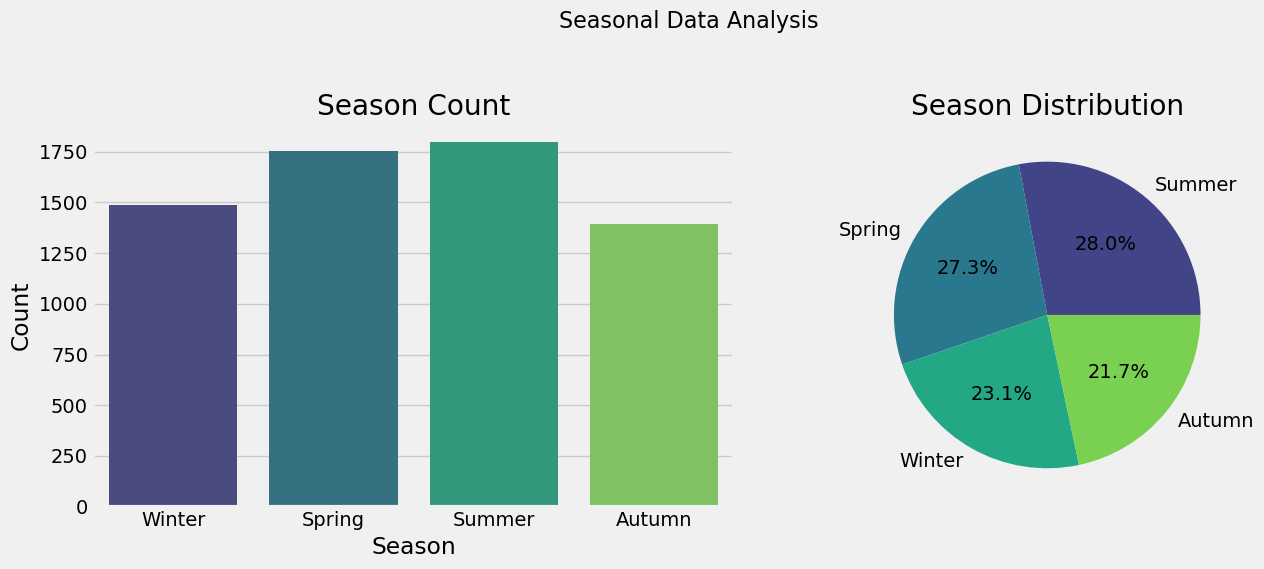

In [19]:

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Countplot for 'season'
sns.countplot(data=data, x='season', ax=ax[0], palette='viridis')  # Using 'viridis' colormap
ax[0].set_title('Season Count')  # Title for the countplot
ax[0].set_xlabel('Season')  # Set the x-axis label
ax[0].set_ylabel('Count')  # Set the y-axis label

# Second subplot: Pie chart for 'season'
pie_values = data['season'].value_counts().values
pie_labels = data['season'].value_counts().index
ax[1].pie(pie_values, labels=pie_labels, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(pie_labels)))
ax[1].set_title('Season Distribution')  # Title for the pie chart

# Main title for the entire figure
fig.suptitle('Seasonal Data Analysis', fontsize=16)

# Adjust layout for spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


**Conclusion:**

- Summer is the most frequent in the dataset because most of the weekly sales were recorded during this season.

---

## Bi-variate Analysis

### 1. weekly_sales & is_holiday

#### Average sales on holidays and regular days?  

In [20]:
data.groupby('is_holiday')['weekly_sales'].mean()

is_holiday
0    1.041256e+06
1    1.122888e+06
Name: weekly_sales, dtype: float64

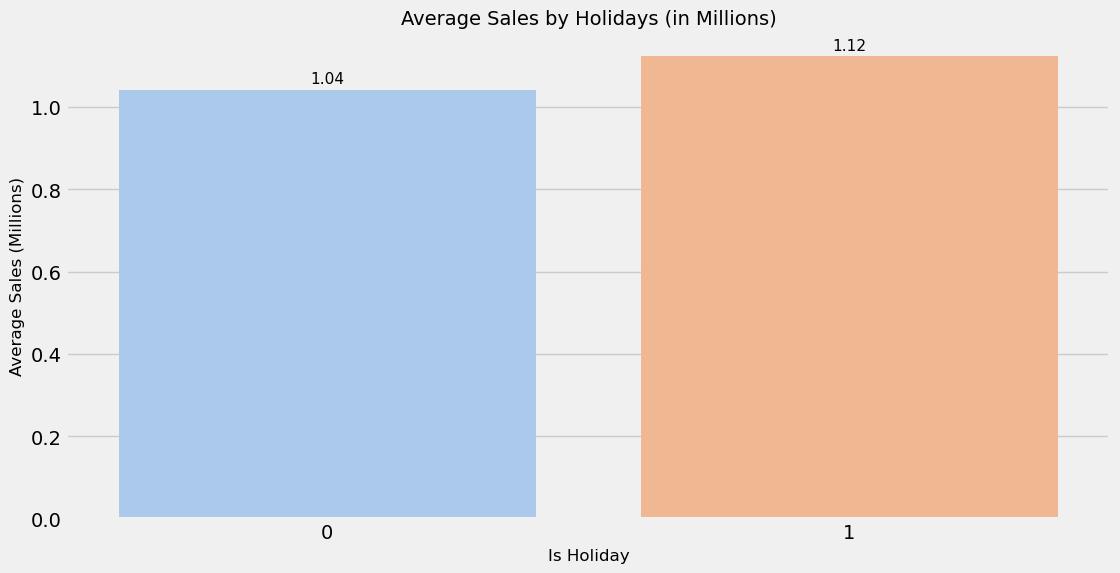

In [21]:

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=data,
                      x='is_holiday',
                      y='weekly_sales_millions',  # Use the scaled column
                      estimator=np.mean,
                      ci=False,
                      palette='pastel')  # Use a soft color palette

# Add labels and title with a slightly larger size for the title
plt.title('Average Sales by Holidays (in Millions)', size=14)
plt.xlabel('Is Holiday', size=12)
plt.ylabel('Average Sales (Millions)', size=12)  # Adjust the y-axis label to reflect the unit change

# Iterate over the bars of the BarPlot to add the data labels
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'), 
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                     ha='center', va='center',
                     size=11, xytext=(0, 8),
                     textcoords='offset points')

plt.show()

**Conclusion:**

- The rate of sales on holidays is higher than on other days.

#### Total sales on holidays and regular days?

In [22]:
data.groupby('is_holiday')['weekly_sales_millions'].sum()

is_holiday
0    6231.919436
1     505.299552
Name: weekly_sales_millions, dtype: float64

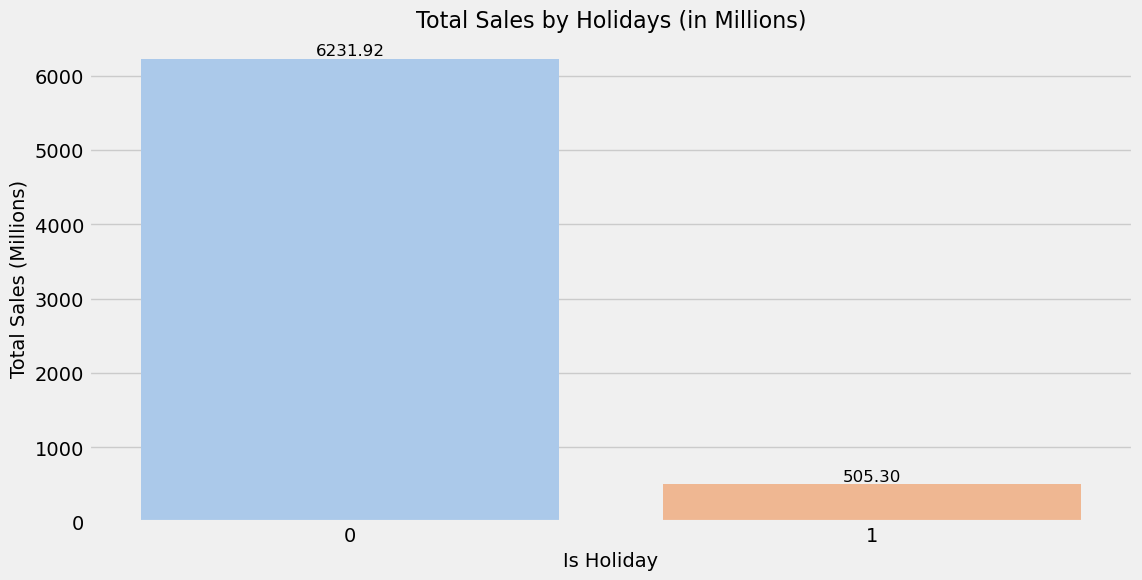

In [23]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=data,
                      x='is_holiday',
                      y='weekly_sales_millions',  # Use the scaled column
                      estimator=np.sum,  # Summing up the sales
                      ci=False)

# Add labels and title
plt.title('Total Sales by Holidays (in Millions)', size=16)  # Updated title to indicate sales are in millions
plt.xlabel('Is Holiday', size=14)
plt.ylabel('Total Sales (Millions)', size=14)  # Label updated to reflect millions

# Iterate over the bars to add the data labels
for bar in barplot.patches:
    bar_height = bar.get_height()  # Get the height of the bar
    label = f'{bar_height:.2f}' if not np.isnan(bar_height) else 'N/A'  # Format the label
    # Place the label above the bar
    plt.text(bar.get_x() + bar.get_width() / 2, bar_height, label,
             ha='center', va='bottom', color='black', size=12)

plt.show()

**Conclusion:**

- Total sales on holidays are lower than on other days, which is normal because the number of holidays is very small compared with the number of other days.

#### Total sales in each store?

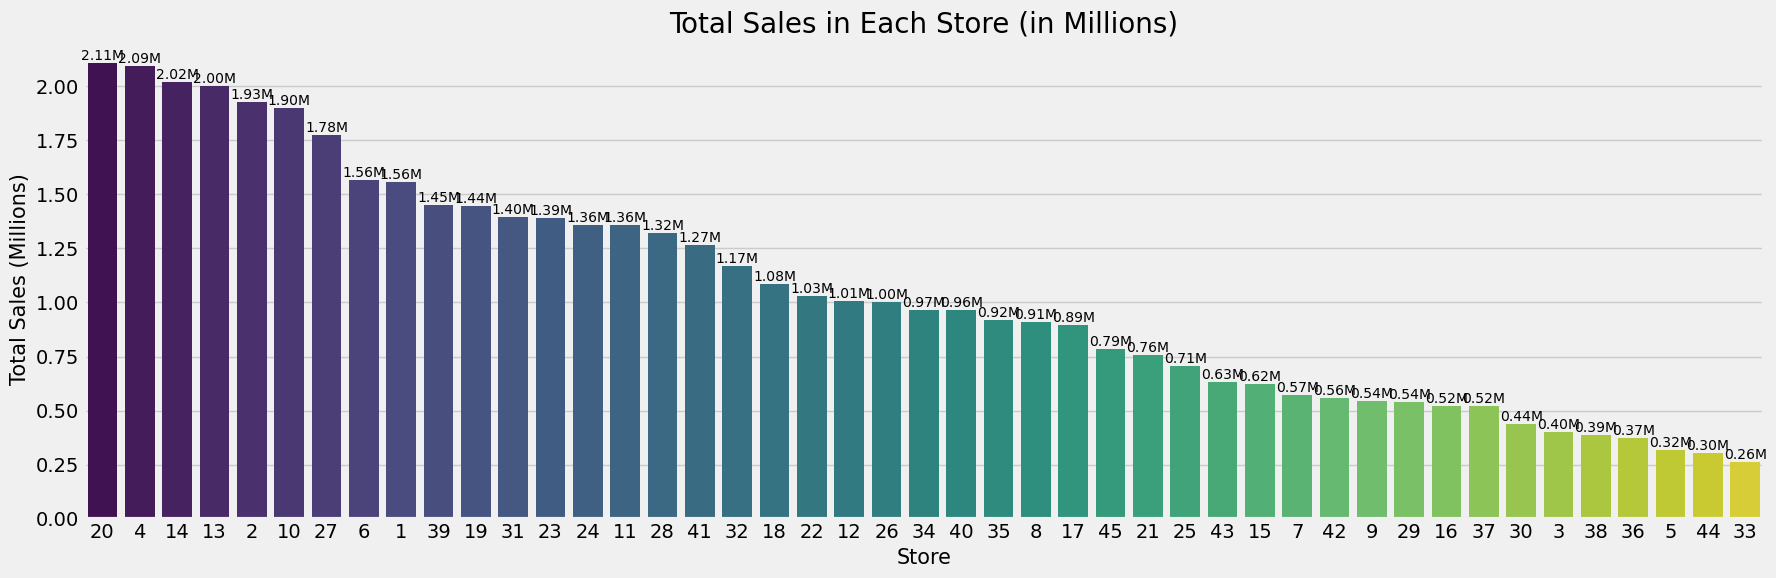

In [24]:
# Calculate the total weekly sales for each store in millions and sort them
gb_store = data.groupby('store')['weekly_sales_millions'].sum().sort_values(ascending=False)

# Set a larger figure size for better visibility
plt.figure(figsize=(18, 6))

# Create a barplot; the 'order' parameter arranges the stores by total sales in millions
barplot = sns.barplot(x='store',
                      y='weekly_sales_millions',  # Make sure to use the millions column
                      data=data,
                      order=gb_store.index,
                      ci=False,
                      palette='viridis')  # A visually pleasing color palette

# Add titles and labels with increased font sizes for better readability
plt.title('Total Sales in Each Store (in Millions)', size=20)  # Include "(in Millions)" in the title
plt.xlabel('Store', size=15)
plt.ylabel('Total Sales (Millions)', size=15)  # Update label to reflect "Millions"

# Annotate each bar with the total sales value
for bar in barplot.patches:
    # The height of the bar is already in millions, so we can just format it directly
    height = bar.get_height()
    label = f'{height:.2f}M'  # Add an 'M' to denote millions
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             label,
             ha='center', va='bottom',
             fontsize=10)

# Adjust the layout to fit everything nicely
plt.tight_layout()

# Display the plot
plt.show()

**Conclusion:**

- The data indicates significant variation in weekly sales among the stores.
- Store No. 20 boasts the highest total sales, reaching approximately 301.40 million. This is closely followed by Store No. 4, with total sales of approximately 299.54 million. On the other end of the spectrum, Store No. 33 has the lowest total sales, amounting to approximately 37.16 million.

#### Weekly sales in the different temperatures?

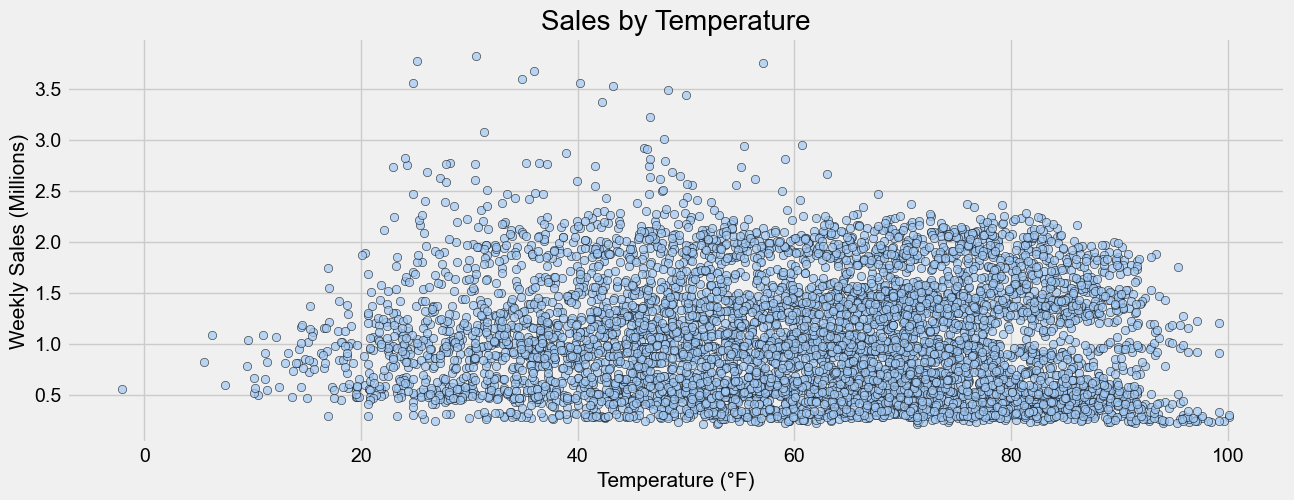

In [25]:
plt.figure(figsize=(14, 5))
# Assuming 'data' has a 'temperature' column and 'weekly_sales_millions' has been appropriately scaled
scatterplot = sns.scatterplot(data=data,
                              x='temperature',
                              y='weekly_sales_millions',
                              edgecolor="black",
                              alpha=0.7)  # Added transparency with alpha parameter

# Add labels and title
plt.title('Sales by Temperature', size=20)
plt.xlabel('Temperature (°F)', size=15)  # Assuming temperature is in Fahrenheit
plt.ylabel('Weekly Sales (Millions)', size=15)  # Ensure units are clearly stated

# Optional: Customize further with seaborn's set_style for a grid and other aesthetics
sns.set_style("whitegrid")

plt.show()

**Conclusion:**

- Based on the scatter plot visualization, there does not appear to be a strong or consistent pattern indicating that changes in temperature significantly affect weekly sales. The data points do not show a clear trend that would suggest a direct or strong correlation between temperature and sales figures when viewed in aggregate. Further statistical analysis would be required to explore this relationship in more depth and to control for other variables that might influence sales.

#### Weekly sales with an increase in fuel price?

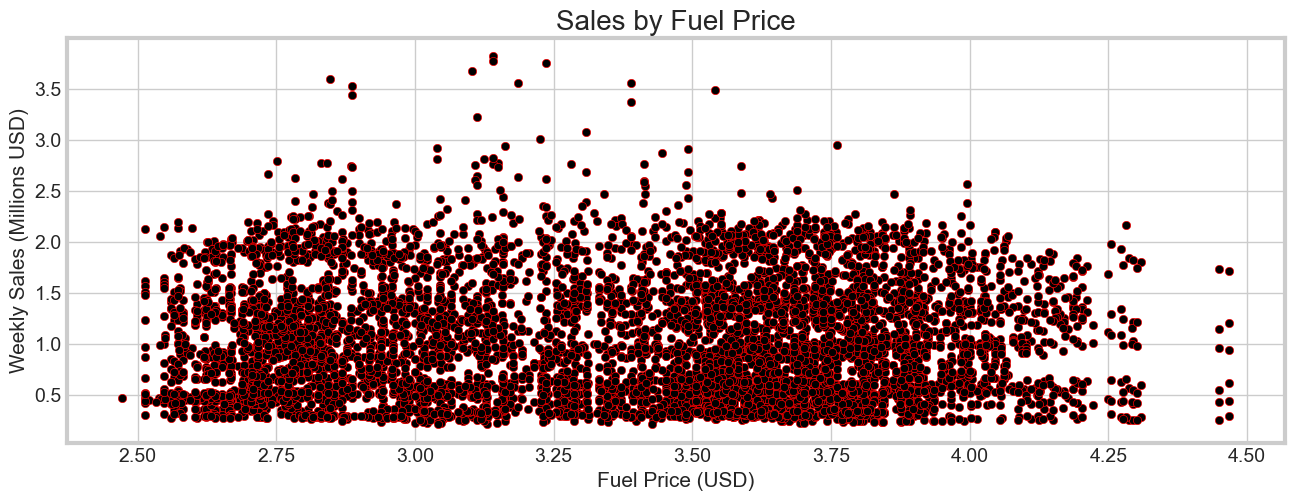

In [26]:
plt.figure(figsize=(14, 5))
# Scatter plot comparing fuel price and weekly sales in millions
scatterplot = sns.scatterplot(data=data,
                              x='fuel_price',
                              y='weekly_sales_millions',
                              color='black',  # Marker fill color
                              edgecolor='red')  # Edge color of each marker

# Add labels and title with increased font sizes for better readability
plt.title('Sales by Fuel Price', size=20)
plt.xlabel('Fuel Price (USD)', size=15)  # Assuming fuel price is in USD
plt.ylabel('Weekly Sales (Millions USD)', size=15)  # Clearly indicate the currency and scale

# Optional: Customize further with seaborn's set_style for a grid and other aesthetics
sns.set_style("whitegrid")

plt.show()

**Conclusion:**

- The scatter plot visualization does not present a clear visual trend that would suggest a strong relationship between fuel prices and weekly sales. While there is no obvious pattern indicating that an increase in fuel price has a significant effect on sales, this observation is purely based on the plot's visual assessment.

#### Weekly sales based on Consumer Price Index (CPI) or the consumer's economic condition?

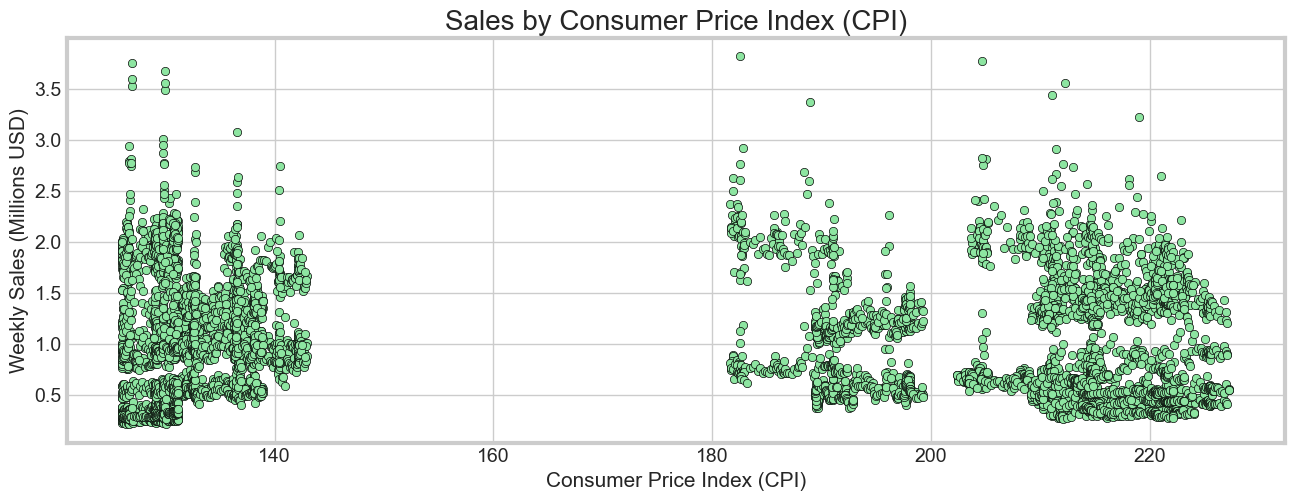

In [27]:
plt.figure(figsize=(14, 5))
# Create a scatter plot for CPI vs. weekly sales in millions
scatterplot = sns.scatterplot(data=data,
                              x='cpi',
                              y='weekly_sales_millions',
                              color='#8de5a1',  # Light green fill color for markers
                              edgecolor='black')  # Black edge color for markers

# Add labels and title with increased font sizes for better readability
plt.title('Sales by Consumer Price Index (CPI)', size=20)
plt.xlabel('Consumer Price Index (CPI)', size=15)
plt.ylabel('Weekly Sales (Millions USD)', size=15)

# Optional: Enhance visual aesthetics with a grid
sns.set_style("whitegrid")

plt.show()

**Conclusion:**

**Relationship Between CPI and Sales:** The scatter plot analysis does not reveal a clear or direct correlation between the Consumer Price Index (CPI) and weekly sales. The distribution of data points lacks a discernible pattern that would indicate a consistent impact of CPI fluctuations on sales volumes.

**CPI Clustering:** The data appears to exhibit clustering in two distinct CPI ranges: 120 to 150 and 180 to 230. These clusters may represent different segments of the market or variations in economic conditions captured during different periods.

**Implications for Customer Segmentation:** CPI is a macroeconomic indicator reflecting overall price trends and is not a measure of individual customer spending. The observed clustering should not be misconstrued as customer segmentation. Detailed customer-centric data and further analysis would be necessary to segment customers accurately and to comprehend the multifaceted influences on their purchasing behavior.

#### Weekly sales based on the unemployment rate?

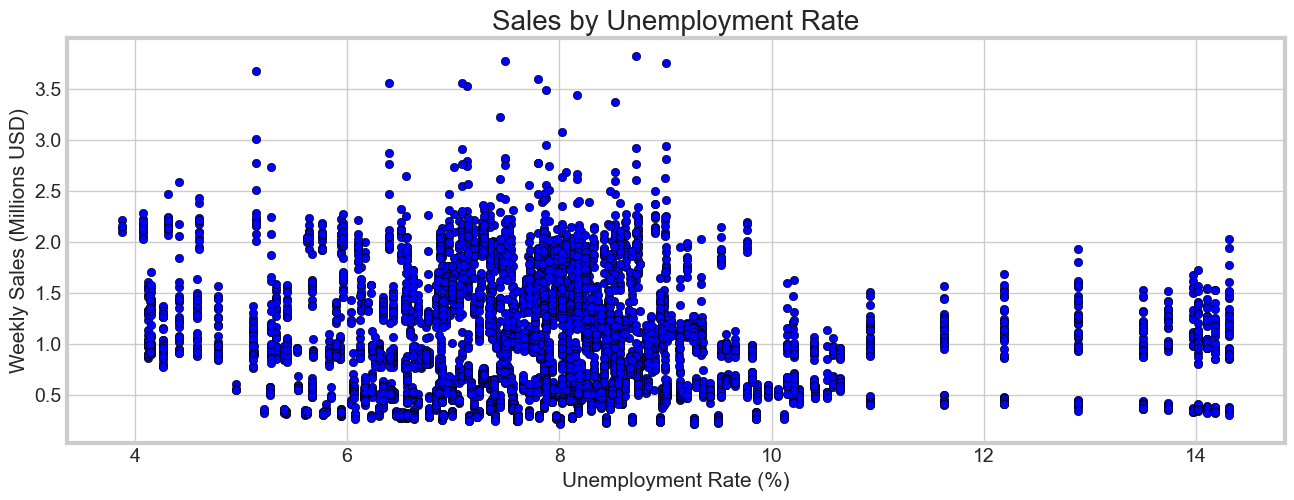

In [28]:
plt.figure(figsize=(14, 5))
# Create a scatter plot for unemployment rate vs. weekly sales in millions
scatterplot = sns.scatterplot(data=data,
                              x='unemployment',
                              y='weekly_sales_millions',  # Ensure to use the millions scaled column
                              color='blue',  # Blue color for the marker fill
                              edgecolor='black')  # Black color for the marker edge

# Add labels and title with increased font sizes for better readability
plt.title('Sales by Unemployment Rate', size=20)
plt.xlabel('Unemployment Rate (%)', size=15)  # Add the percentage symbol to indicate rate
plt.ylabel('Weekly Sales (Millions USD)', size=15)  # Corrected to indicate millions

# Optional: Enhance visual aesthetics with a grid
sns.set_style("whitegrid")

plt.show()

**Conclusion:**

- Based on the visual analysis of the scatter plot, there appears to be a trend where sales decrease as the unemployment rate increases.

---

#### Total sales in each year?

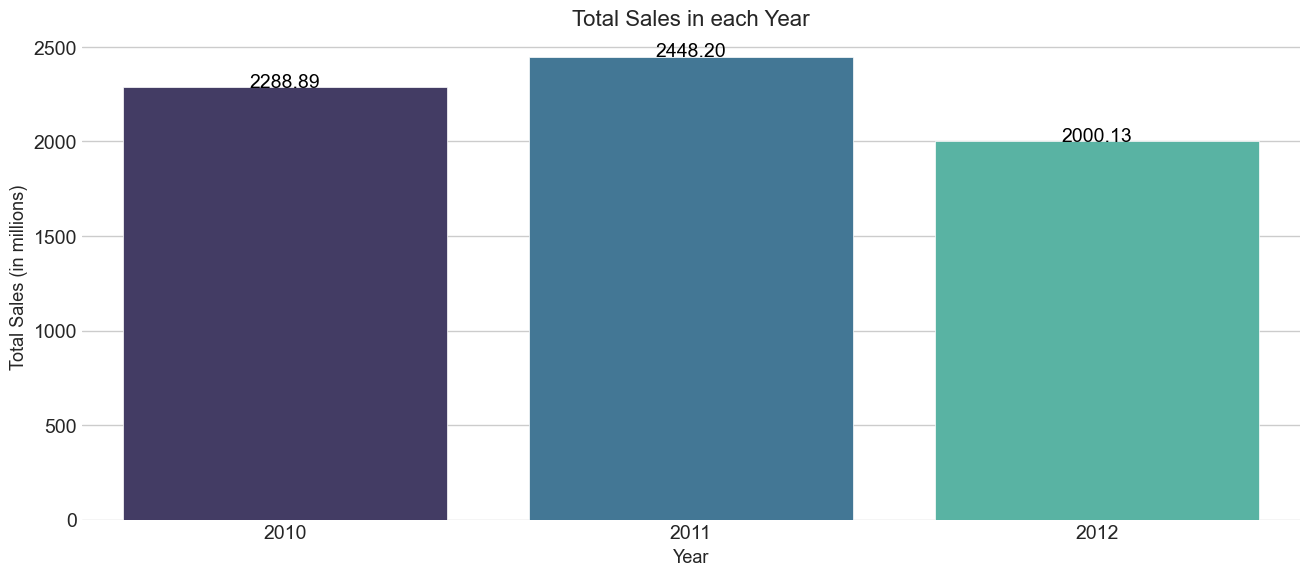

In [29]:
# Calculate the sum of weekly sales for each year
yearly_sales_sum = data.groupby('year')['weekly_sales_millions'].sum().reset_index()

# Set the figure size to be large enough to be clear and engaging
plt.figure(figsize=(14, 6))

# Use Seaborn to create the bar plot
sns.barplot(data=yearly_sales_sum,
            x='year',
            y='weekly_sales_millions',
            ci=None,  # Confidence interval is turned off
            palette='mako')  # Using a color palette for aesthetics

# Add meaningful labels and titles to enhance the storytelling
plt.title('Total Sales in each Year', size=16)
plt.xlabel('Year', size=13)
plt.ylabel('Total Sales (in millions)', size=13)

# Utilize Gestalt principles by removing clutter
sns.despine(left=True, bottom=True)

# Add annotations on each bar to display the exact sales value
for index, row in yearly_sales_sum.iterrows():
    plt.text(row.name, row['weekly_sales_millions'], f"{row['weekly_sales_millions']:.2f}", color='black', ha="center")

# Show the plot
plt.show()

**Conclusion:**

- In 2011, total sales achieved the highest recorded for the year, reaching approximately $2,448.2 million.

#### Total sales in each season?

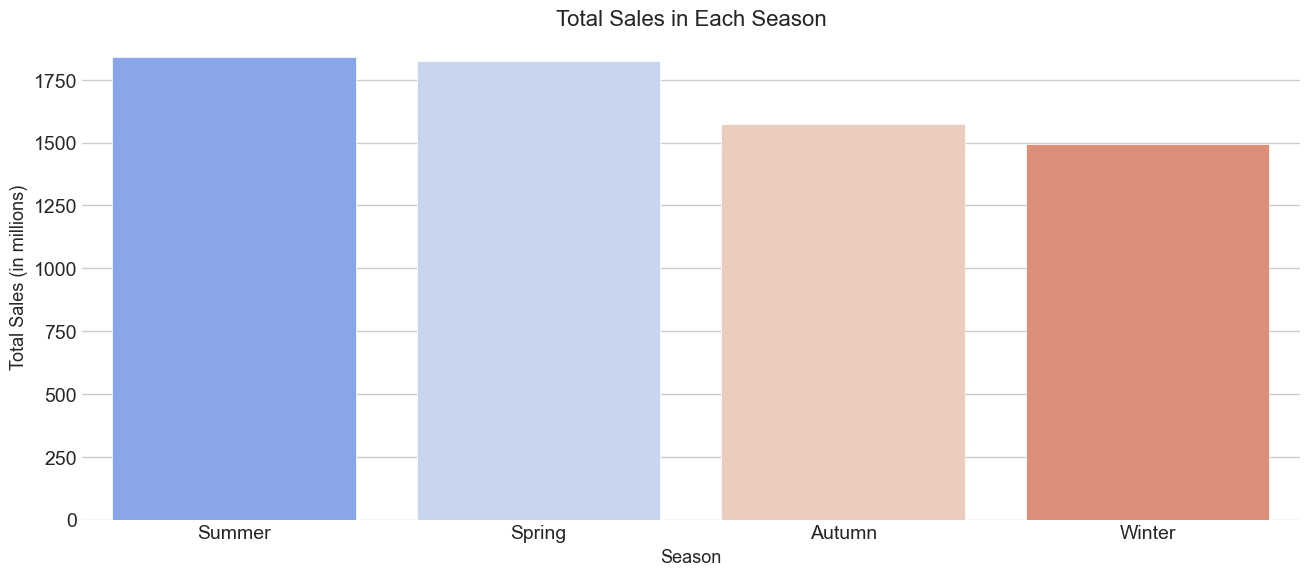

In [30]:
# Calculate the sum of weekly sales for each season and sort them
seasonal_sales_sum = data.groupby('season')['weekly_sales_millions'].sum().sort_values(ascending=False).reset_index()

# Set the figure size to be large enough to be clear and engaging
plt.figure(figsize=(14, 6))

# Use Seaborn to create the bar plot
sns.barplot(data=seasonal_sales_sum,
            x='season',
            y='weekly_sales_millions',
            ci=None,  # Confidence interval is turned off
            order=seasonal_sales_sum['season'],  # Order the bars by sales volume
            palette='coolwarm')  # Using a color palette for aesthetics

# Add meaningful labels and titles to enhance the storytelling
plt.title('Total Sales in Each Season', size=16)
plt.xlabel('Season', size=13)
plt.ylabel('Total Sales (in millions)', size=13)

# Utilize Gestalt principles by removing clutter
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()

**Conclusion:**

- Among all the seasons, Summer consistently records the highest total sales, reaching an impressive $1.14 billion. This indicates that customers tend to spend more during the Summer season compared to other times of the year.

#### Q10: What are the total sales in each month?

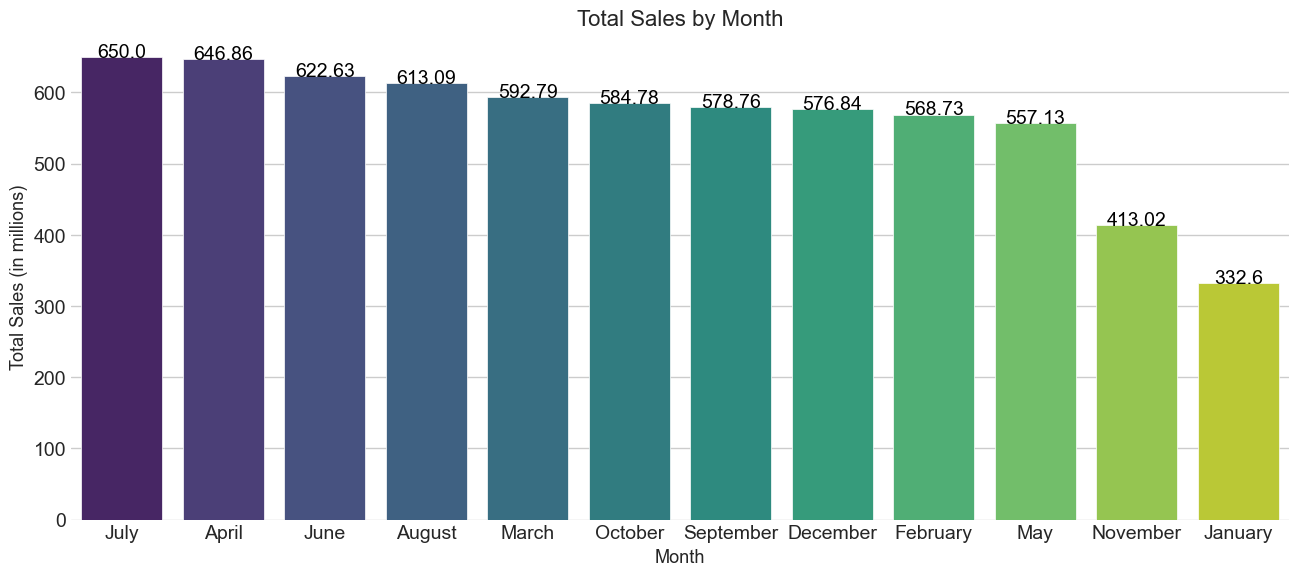

In [31]:
# Calculate the sum of weekly sales for each month and sort them
monthly_sales_sum = data.groupby('month_name')['weekly_sales_millions'].sum().sort_values(ascending=False).reset_index()

# Set the figure size to be large enough to be clear and engaging
plt.figure(figsize=(14, 6))

# Use Seaborn to create the bar plot
# Note that the data is passed already sorted in descending order
barplot = sns.barplot(x='month_name',
                      y='weekly_sales_millions',
                      data=monthly_sales_sum,
                      ci=None,  # Confidence interval is turned off
                      palette='viridis')  # Using a color palette for aesthetics

# Add meaningful labels and titles to enhance the storytelling
plt.title('Total Sales by Month', size=16)
plt.xlabel('Month', size=13)
plt.ylabel('Total Sales (in millions)', size=13)

# Utilize Gestalt principles by removing clutter
sns.despine(left=True, bottom=True)

# Add the value on top of each bar
for index, row in monthly_sales_sum.iterrows():
    barplot.text(row.name, row['weekly_sales_millions'], round(row['weekly_sales_millions'], 2), color='black', ha="center")

# Show the plot
plt.show()

**Conclusion:**

- The month of July stands out as the period with the highest total sales across all years, reaching a remarkable sum of approximately $650 million.

#### Total sales in each week?

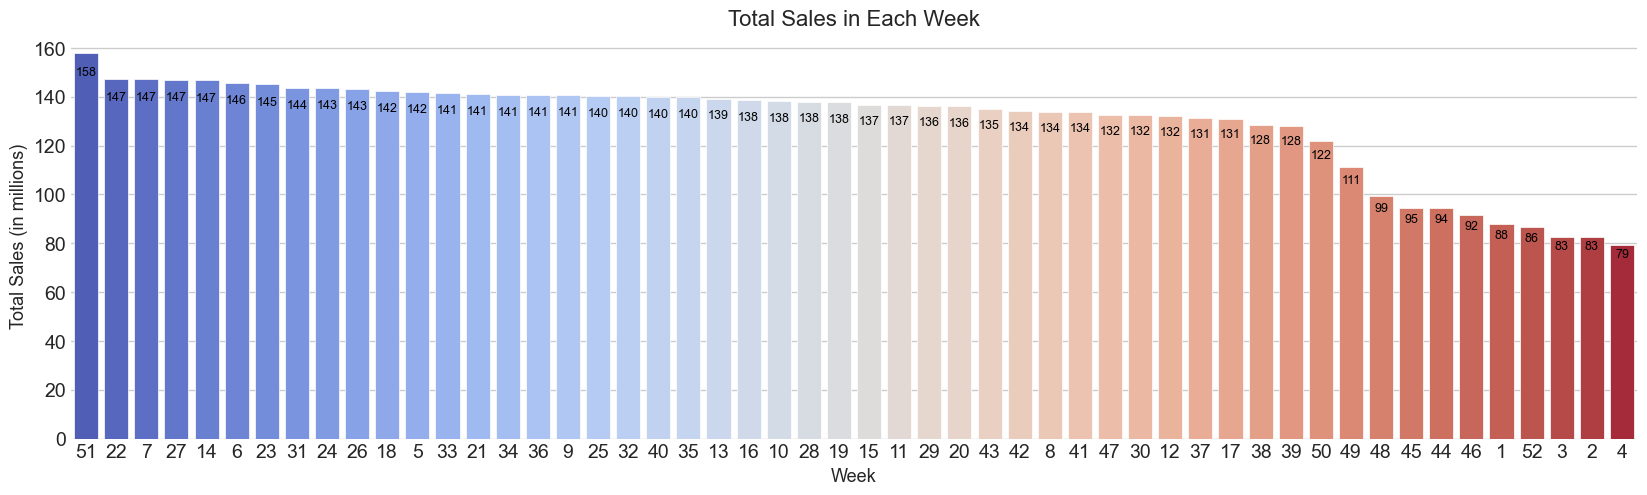

In [32]:
# Group data by week, sum weekly sales, and sort by sales in descending order
gp_week = data.groupby('week')['weekly_sales_millions'].sum().sort_values(ascending=False)

# Create a bar plot of the total weekly sales
plt.figure(figsize=(18, 5))
barplot = sns.barplot(x=gp_week.index,
                      y=gp_week.values,
                      order=gp_week.index,  # Ensure the bars follow the sorted order
                      ci=False,  # Turn off the confidence interval
                      palette='coolwarm')  # Use a color palette for aesthetics

# Add labels and a title
plt.title('Total Sales in Each Week', size=16)
plt.xlabel('Week', size=13)
plt.ylabel('Total Sales (in millions)', size=13)

# Remove the top and right spines for a cleaner look
sns.despine(left=True, bottom=True)

# Annotate the bars with the rounded data values inside the bars
for index, value in enumerate(gp_week.values):
    # Place the text inside the bars, adjust the position based on the bar height
    text_position = value - (0.05 * value) if value > gp_week.values.max() * 0.05 else value + (0.03 * value)
    barplot.text(index, text_position, f'{value:.0f}', color='black', ha="center", va="center", fontsize=9)  # Reduced font size

# Show the plot
plt.show()

**Conclusion:**

- The week with the highest cumulative sales across all years is week 51, which saw a remarkable total of approximately $157.93 million in sales.

---

# Data Correlation

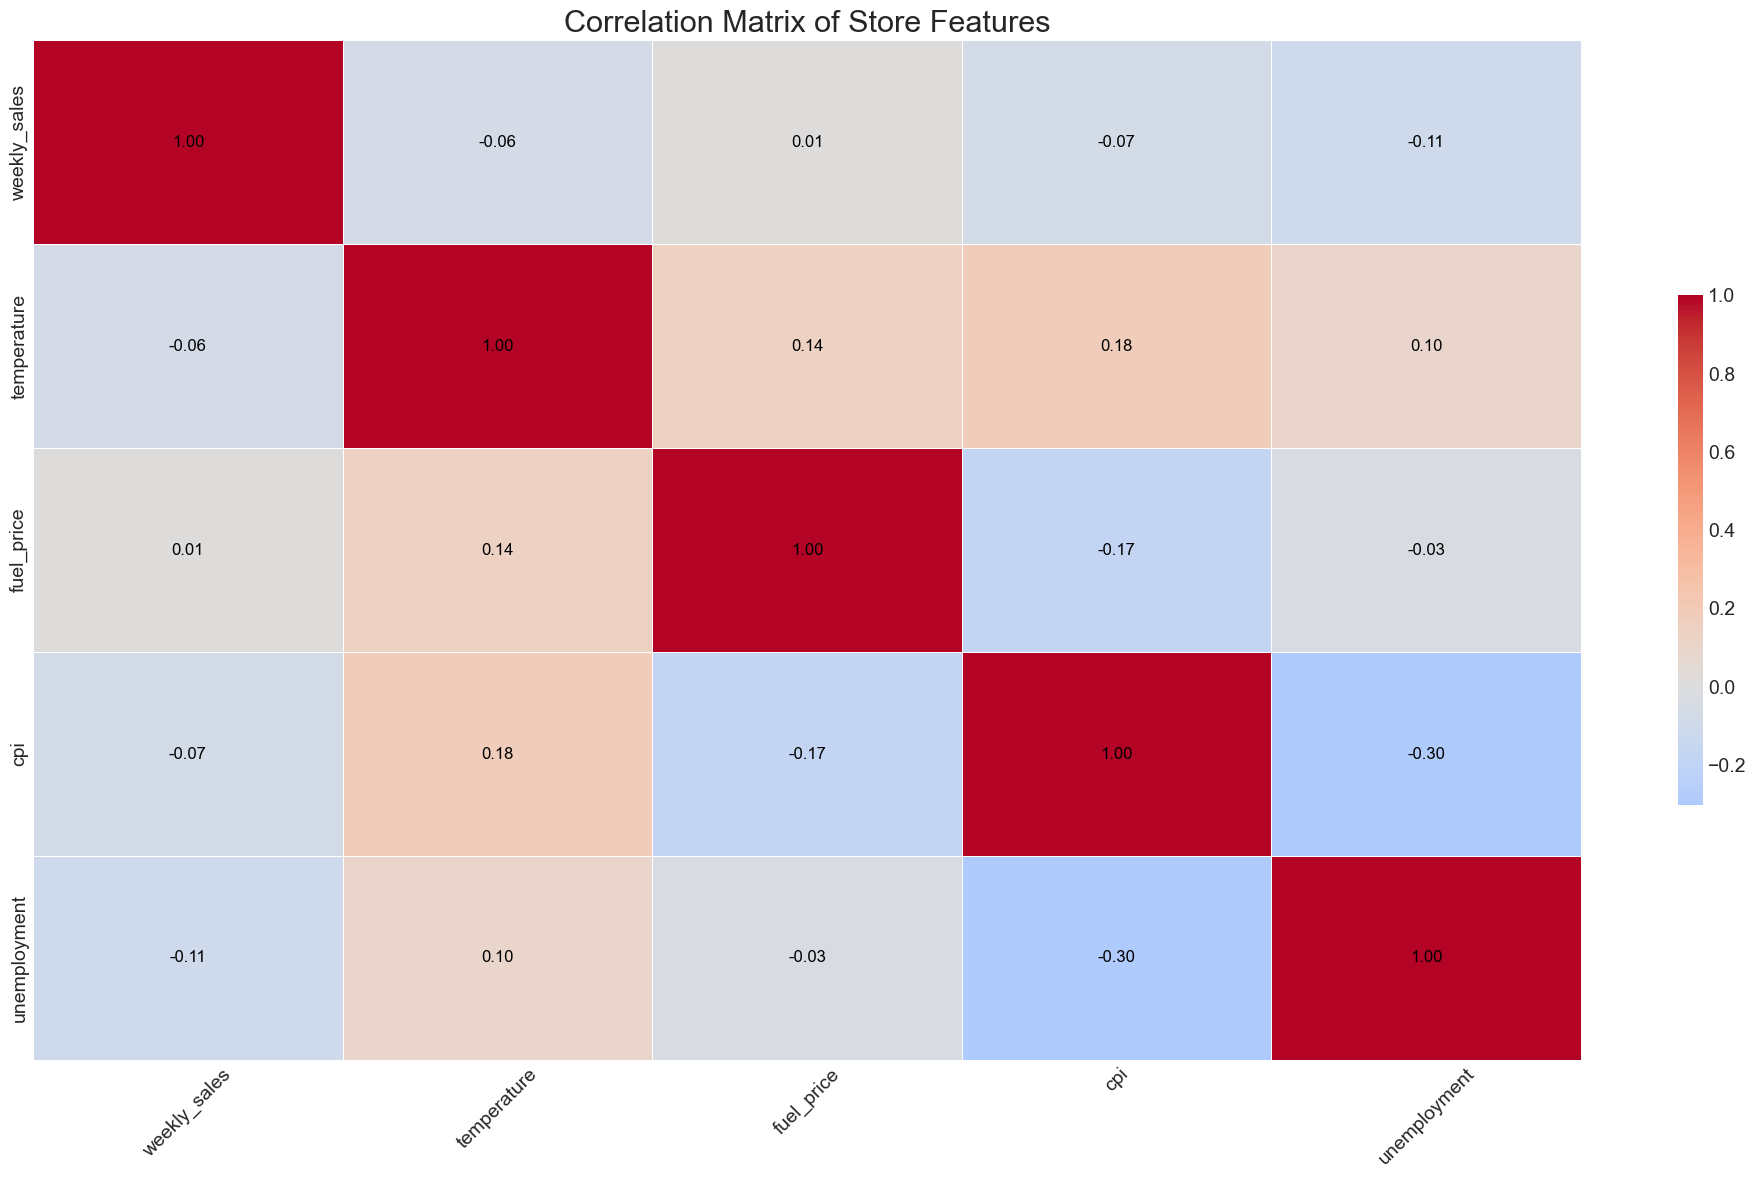

In [33]:
# Calculate the correlation matrix
correlation_matrix = data[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']].corr()

# Create the heatmap with enhanced design principles
plt.figure(figsize=(20, 12))
# Choosing a diverging color palette to highlight both positive and negative correlations
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
                      annot_kws={"size": 12, "color": 'black'},  # Adjust annotation properties
                      linewidths=.5,  # Add lines between cells
                      cbar_kws={"shrink": .5, "orientation": "vertical"})  # Adjust color bar

# Add a title and format it for better storytelling
plt.title('Correlation Matrix of Store Features', fontsize=22)
plt.xticks(fontsize=14, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)  # Increase y-axis labels font size

# Utilizing Gestalt principles to enhance comprehension
plt.tight_layout()  # Ensure everything fits without overlapping

# Show the plot
plt.show()

---

# Data Pre-processing

## 1. Taking A Copy Of The Data

In [34]:
data_copy = data.copy()

## 2. Dropping Unnecessary Columns

- Let's drop columns 'date', 'year' and drop columns 'quarter' and 'month'since there are the same columns as 'season' and 'month_name'.

- In the "day_of_week" column, Friday is the most frequent with 67.1% compared to other days, so the model will be biased to the class of Friday, so it prefers to drop this column to avoid underfitting.

In [35]:
data_copy.drop(['date', 'year', 'quarter', 'month', 'day_of_week', 'weekly_sales_millions'], axis = 1, inplace = True)

## 3. Data Type

In [36]:
# Check the data types
data_copy.dtypes

store             int64
weekly_sales    float64
is_holiday        int64
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
season           object
month_name       object
week              int32
dtype: object

In [37]:
# let's handle store and holiday columns as categorical features, so we should convert them into categories (objects).bb
data_copy['store'] = data_copy['store'].astype('object')
data_copy['is_holiday'] = data_copy['is_holiday'].astype('object')
data_copy['week'] = data_copy['week'].astype('object')

In [38]:
# Check the data types after convert
data_copy.dtypes

store            object
weekly_sales    float64
is_holiday       object
temperature     float64
fuel_price      float64
cpi             float64
unemployment    float64
season           object
month_name       object
week             object
dtype: object

## 4. Detecting And Removing The Outliers

0 fuel_price
1 temperature
2 cpi
3 unemployment


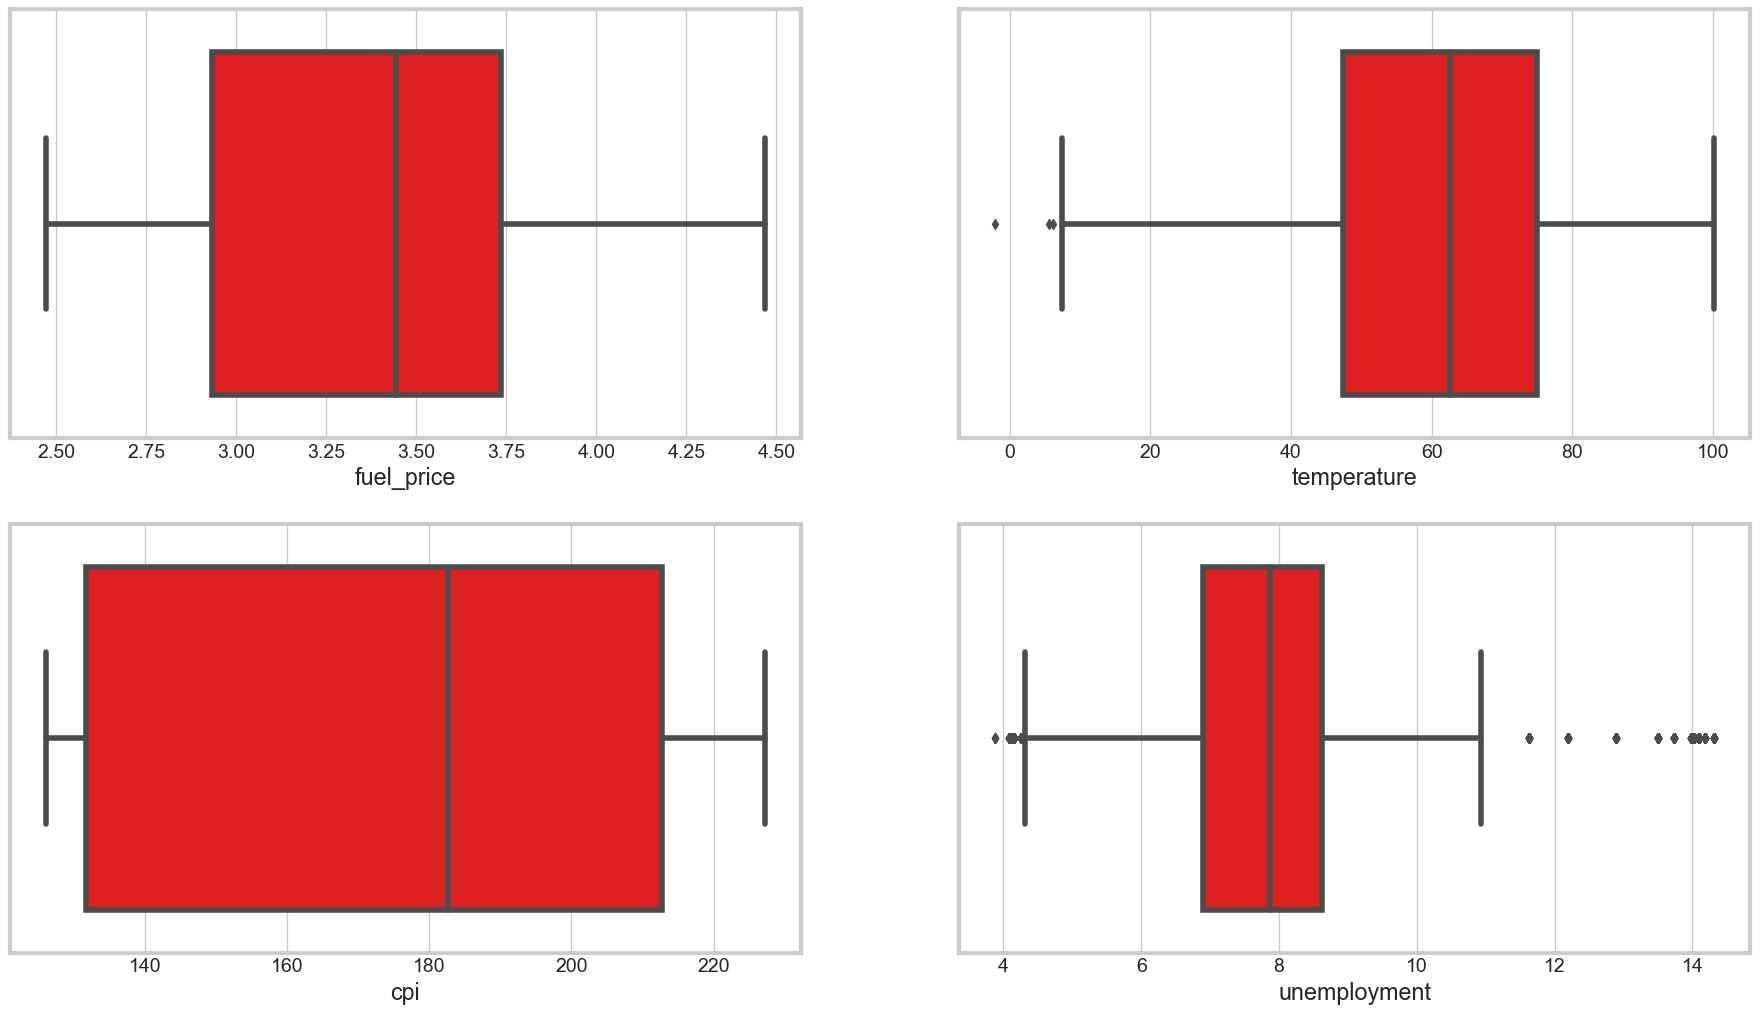

Number of data rows:  6435


In [39]:
cols = ['fuel_price', 'temperature', 'cpi', 'unemployment']
plt.figure(figsize=(20,18))
for i,col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_copy, x = col, color = 'red')
plt.show()

print('Number of data rows: ', data_copy.shape[0])

In [40]:
# Remove outliers from the temperature column
data_copy.drop(data_copy[data_copy['temperature'] < 7].index, axis = 0, inplace = True)

In [41]:
# Remove outliers from the unemployment column
data_copy.drop(data_copy[data_copy['unemployment'] < 4.5].index, axis = 0, inplace = True)
data_copy.drop(data_copy[data_copy['unemployment'] > 10.8].index, axis = 0, inplace = True)

0 temperature
1 fuel_price
2 cpi
3 unemployment


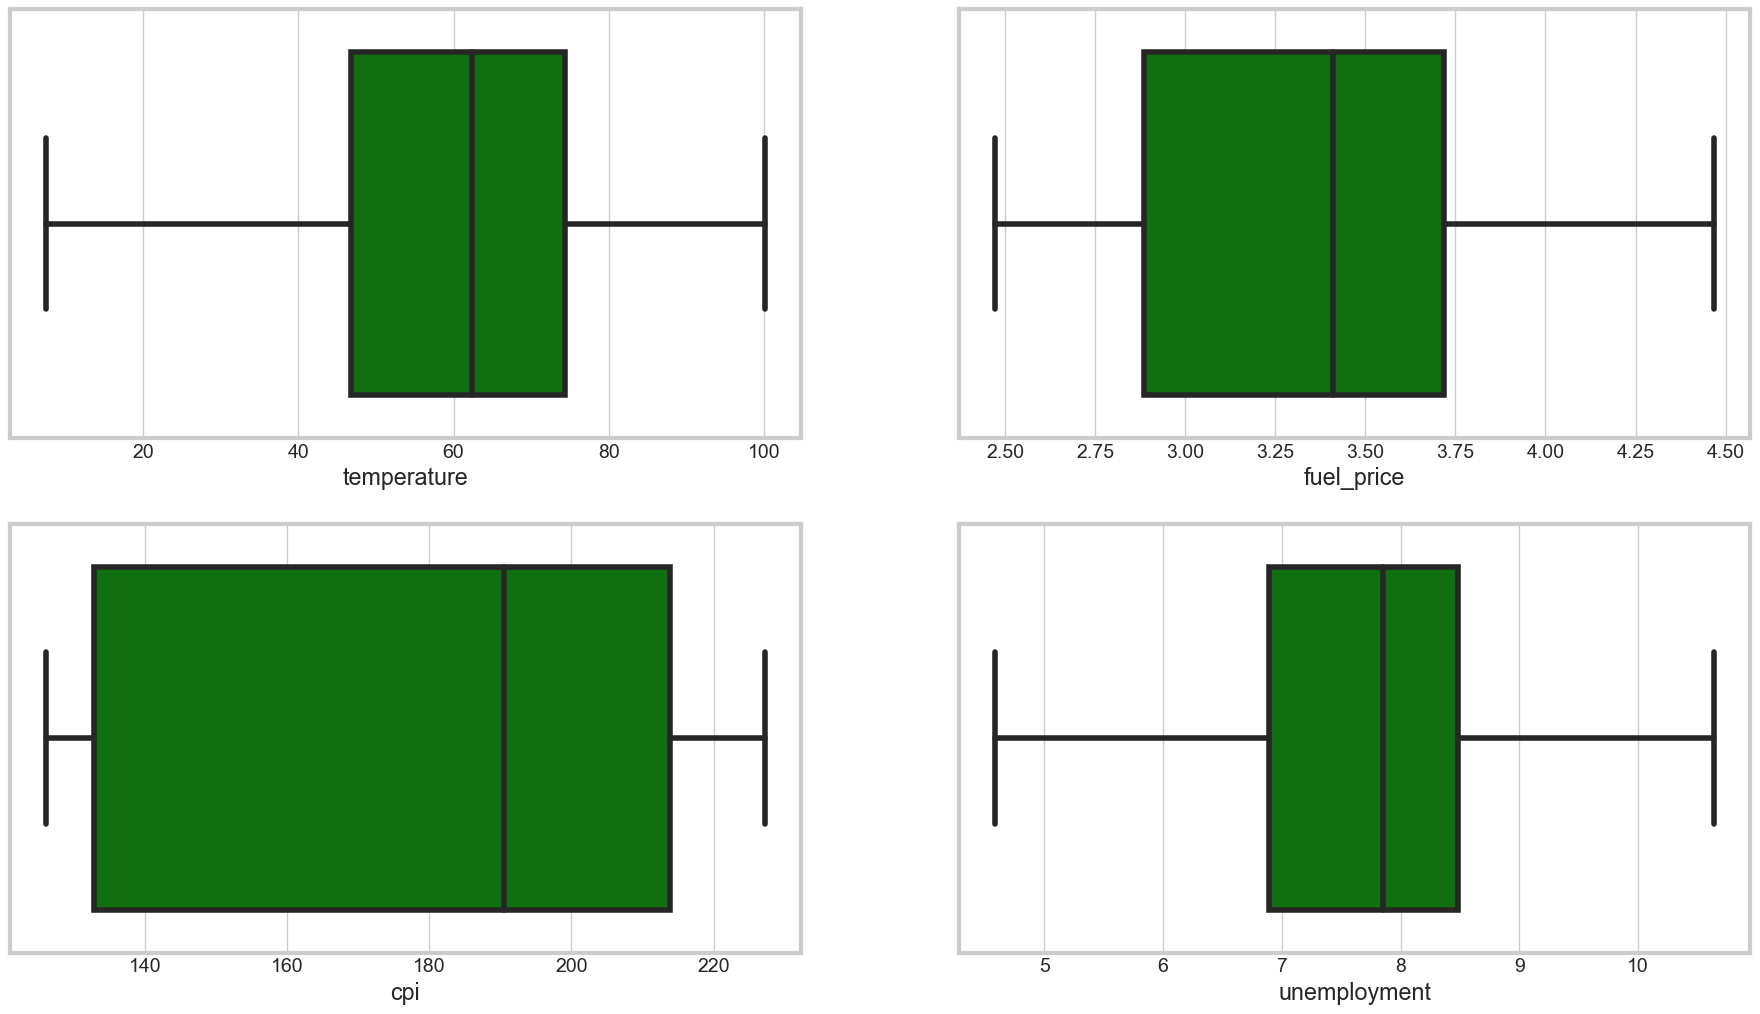

Number of data rows:  5873


In [42]:
cols = ['temperature', 'fuel_price', 'cpi', 'unemployment']
plt.figure(figsize=(20,18))
for i, col in enumerate(cols):
    print(i, col)
    plt.subplot(3,2,i+1)
    sns.boxplot(data_copy, x = col, color = 'g')
plt.show()

print('Number of data rows: ', data_copy.shape[0])

### 5. Splitting The Data To Training And Testing Data

In [43]:
X = data_copy.drop('weekly_sales', axis = 1)
y = data_copy['weekly_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
print('Shape of data      : ', X.shape)
print('Shape of train data: ', X_train.shape)
print('Shape of test data : ', X_test.shape)

Shape of data      :  (5873, 9)
Shape of train data:  (4698, 9)
Shape of test data :  (1175, 9)


### 6. Data Transformation

In [45]:
# Splitting the data into Numerical Features and Categorical Features
num_features = data_copy.select_dtypes('number').columns.to_list()
num_features.remove('weekly_sales')

cat_features = data_copy.select_dtypes('object').columns.to_list()

print(f'Numerical Features : {num_features}')
print(f'Categorical Features: {cat_features}')

Numerical Features : ['temperature', 'fuel_price', 'cpi', 'unemployment']
Categorical Features: ['store', 'is_holiday', 'season', 'month_name', 'week']


In [46]:
# data transformation pipeline
preprocessor = ColumnTransformer([
                                  ('num_features', StandardScaler(), num_features),
                                  ('cat_features', BinaryEncoder(), cat_features),
                                ])

# Fitting the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num_features', StandardScaler(),
                                 ['temperature', 'fuel_price', 'cpi',
                                  'unemployment']),
                                ('cat_features', BinaryEncoder(),
                                 ['store', 'is_holiday', 'season', 'month_name',
                                  'week'])])

In [47]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

---

# Modeling

In [48]:
def model_evaluation(estimator, Training_Testing, X, y):

    ''' This function is used to evaluate the model through RMSE and R2'''

    # Y predict of X train or X test
    predict_data = estimator.predict(X)

    print(f'{Training_Testing} Accuracy: \n')
    print(f'-> Root Mean Squared Error: {round(np.sqrt(mean_squared_error(y, predict_data)), 2)}')
    print(f'-> R-Squere score Training: {round(r2_score(y, predict_data) * 100, 2)} % \n')

In [49]:
def Distribution_Plot(estimator, Training_Testing, X, y, Title):

    """This function is used to perform some model evaluation using training and testing data \
    by plotting the distribution of the actual and predicted values of the training or testing data."""

    # Y predict of X train or X test
    yhat = estimator.predict(X)

    plt.figure(figsize=(14, 6))
    ax1 = sns.distplot(y, hist = False, color = "b", label = f'Actual Values ({Training_Testing})')
    ax2 = sns.distplot(yhat, hist = False, color = "r", label = f'Predicted Values ({Training_Testing})', ax = ax1)
    plt.title(Title, size = 18)
    plt.legend()
    plt.show()

In [50]:
def cross_validation_score(estimator, X_train, y_train, score = 'r2', n = 5):

    '''This function is to validate the model'''


    validate = cross_val_score(estimator, X_train, y_train, scoring = score, cv = n)

    print(f'Cross Validation Scores: {validate} \n')
    print(f'Mean of Scores: {round(validate.mean() * 100, 2)} % \n')
    print(f'Standard Deviation of Scores: {validate.std()}')

In [51]:
def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'r2', n = 5):

    '''This function is used to find the best set of hyperparameters for the model to optimize its performance'''


    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = param_grid,
                               scoring = score,
                               cv = n)

    # Fit the data
    grid_search.fit(X_train,y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # best estimator
    best_estimator = grid_search.best_estimator_

    return best_estimator

## 1. Linear Regression

### 1.1. Creating The Model

In [52]:
# Linear Regression Model
LR = LinearRegression()

# Fitting the data
LR.fit(X_train_transformed, y_train)

LinearRegression()

### 1.2. Evaluating The Model (Training)

In [53]:
# Training Accuracy
model_evaluation(LR, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 540417.89
-> R-Squere score Training: 10.9 % 



</h4>Let's examine the distribution of the predicted values of the training data</h4>

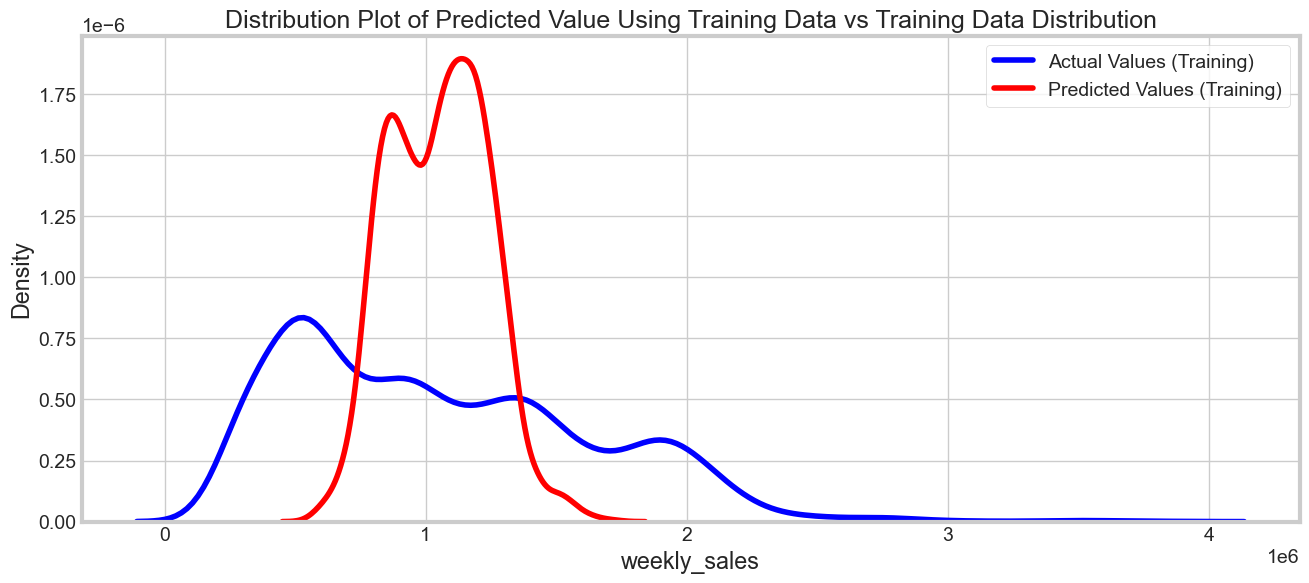

In [54]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(LR, 'Training', X_train_transformed, y_train, Title)

**Conclusion:**
- Since there are no linear correlations between variables and targets, The model seems to be not doing well in learning from the training dataset, so we need to increase the complexity of this model. let's do Polynomial Features for the data before modeling.

### 1.3. Tuning The Model

In [55]:
# Polynomial Regression Model
LR_pipe = Pipeline([('poly_feat', PolynomialFeatures()),
                    ('lin_reg', LinearRegression())])

# Define the parameter grid to search
param_grid = {'poly_feat__degree': [2, 3, 4]}

best_estimator = hyperparameter_tunning(LR_pipe, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best parameters: {'poly_feat__degree': 3} 

Best score: 0.9508328925215285


In [56]:
# Linear Regression Model after tuning
poly_reg = best_estimator

### 1.4. Evaluating The Model  After Tuning

In [57]:
# Training Accuracy Afer tuning
model_evaluation(poly_reg, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 77308.94
-> R-Squere score Training: 98.18 % 



</h4>Let's examine the distribution of the predicted values of the training data after tuning</h4>

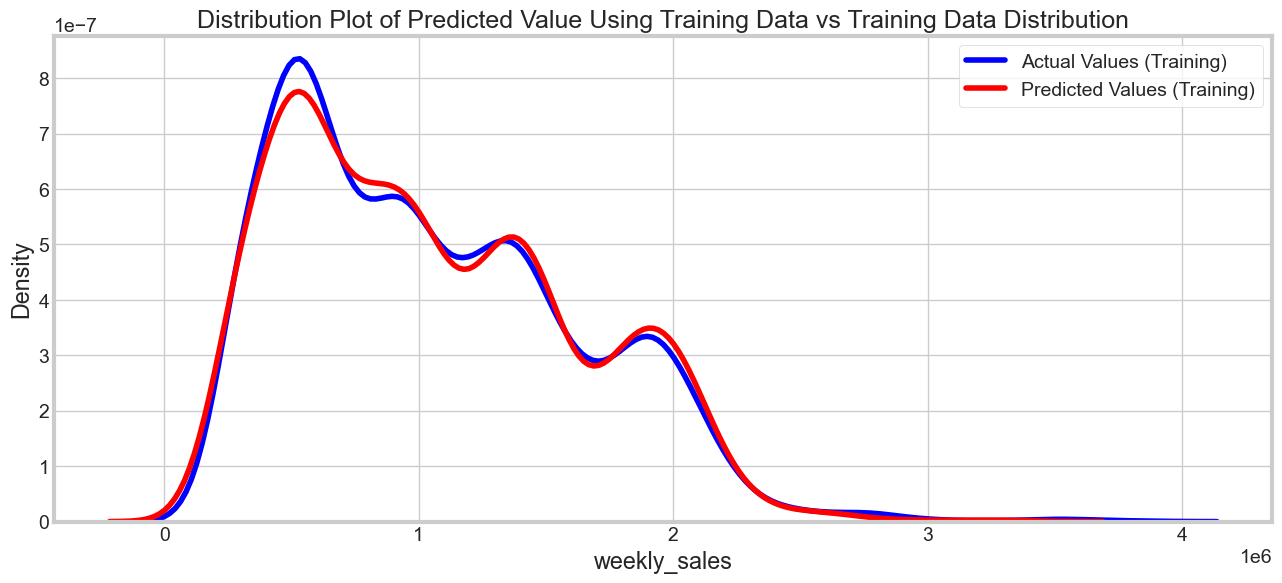

In [58]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(poly_reg, 'Training', X_train_transformed, y_train, Title)

**Conclusion:**
- After applying Polynomial Features to the training data, The model seems to have improved more in learning from the training dataset.


### 1.5. Cross Validation Score

In [59]:
cross_validation_score(poly_reg, X_train_transformed, y_train)

Cross Validation Scores: [0.95762046 0.94943526 0.94804955 0.95478806 0.94427113] 

Mean of Scores: 95.08 % 

Standard Deviation of Scores: 0.004784801586573472


### 1.6. Testing The Model

In [60]:
# Testing Accuracy
model_evaluation(poly_reg, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 111066.1
-> R-Squere score Training: 96.18 % 



</h4>Let's examine the distribution of the predicted values of the test data.</h4>

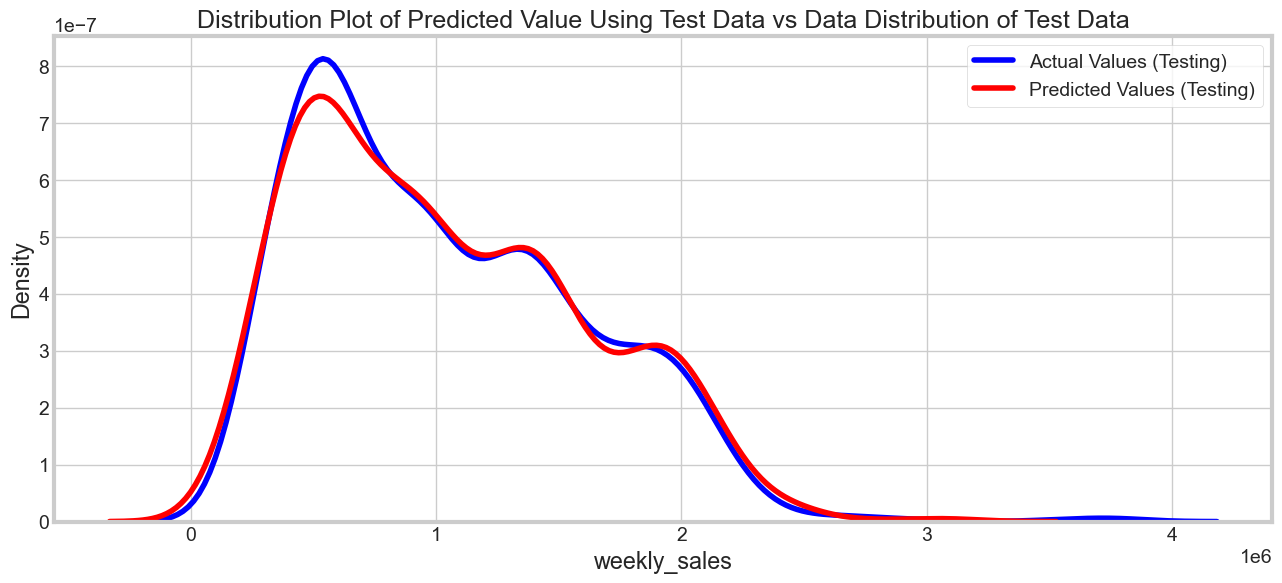

In [61]:
# Figure 3: Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(poly_reg, 'Testing', X_test_transformed, y_test, Title)

**Conclusion:**
- After testing the polynomial regression model, it became clear that the model had learned sufficiently, as its accuracy was 96.84 %.

## 2. KNN Regressor

### 2.1. Creating The Model

In [62]:
# KNN Regression Model
KNN_Reg = KNeighborsRegressor(n_neighbors = 5)

# Fitting the training data
KNN_Reg.fit(X_train_transformed, y_train)

KNeighborsRegressor()

### 2.2. Evaluating The Model (Training)

In [63]:
# Training Accuracy
model_evaluation(KNN_Reg, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 370445.47
-> R-Squere score Training: 58.13 % 



<b4>Let's examine the distribution of the predicted values of the training data<b4>

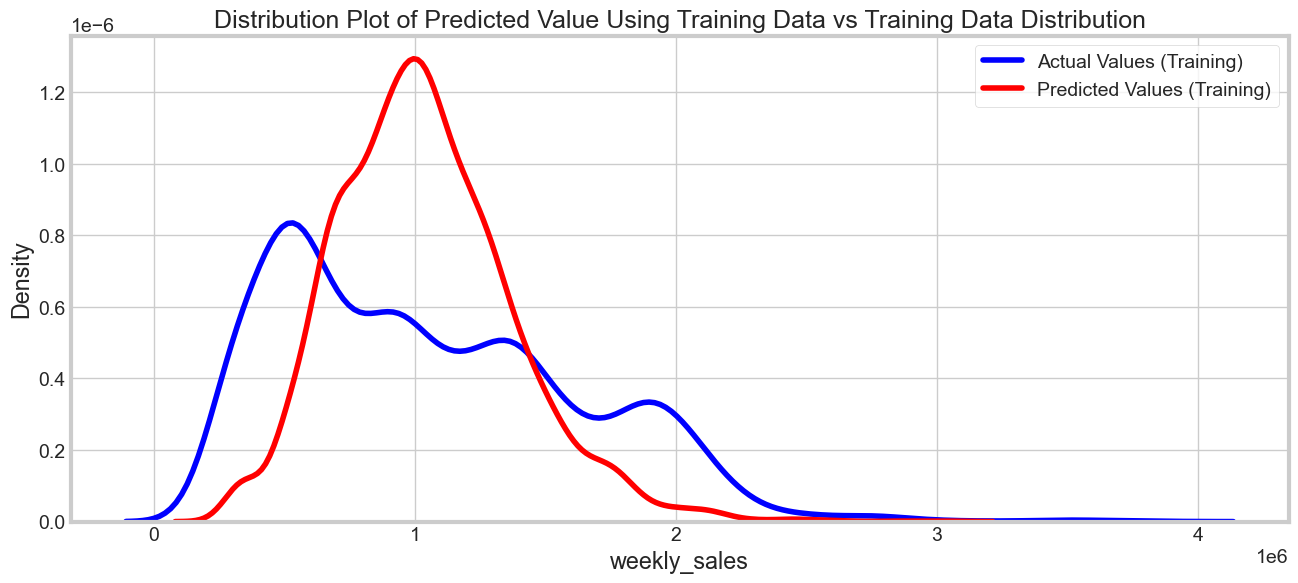

In [64]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(KNN_Reg, 'Training', X_train_transformed, y_train, Title)

**Conclusion:**
- The model seems to be doing not bad in learning from the training dataset.

### 2.3. Tuning The Model

In [65]:
# Define the parameter grid to search
param_grid = {'n_neighbors': [1, 3, 5, 7, 8, 9, 11, 13]}

best_estimator = hyperparameter_tunning(KNN_Reg, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best_KNN = best_estimator

Best parameters: {'n_neighbors': 13} 

Best score: 0.34650693841848945


### 2.4. Evaluating The Model After Tuning

In [66]:
# Training Accuracy Afer tuning
model_evaluation(Best_KNN, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 425207.27
-> R-Squere score Training: 44.84 % 



<b4>Let's examine the distribution of the predicted values of the training data after tuning<b4>

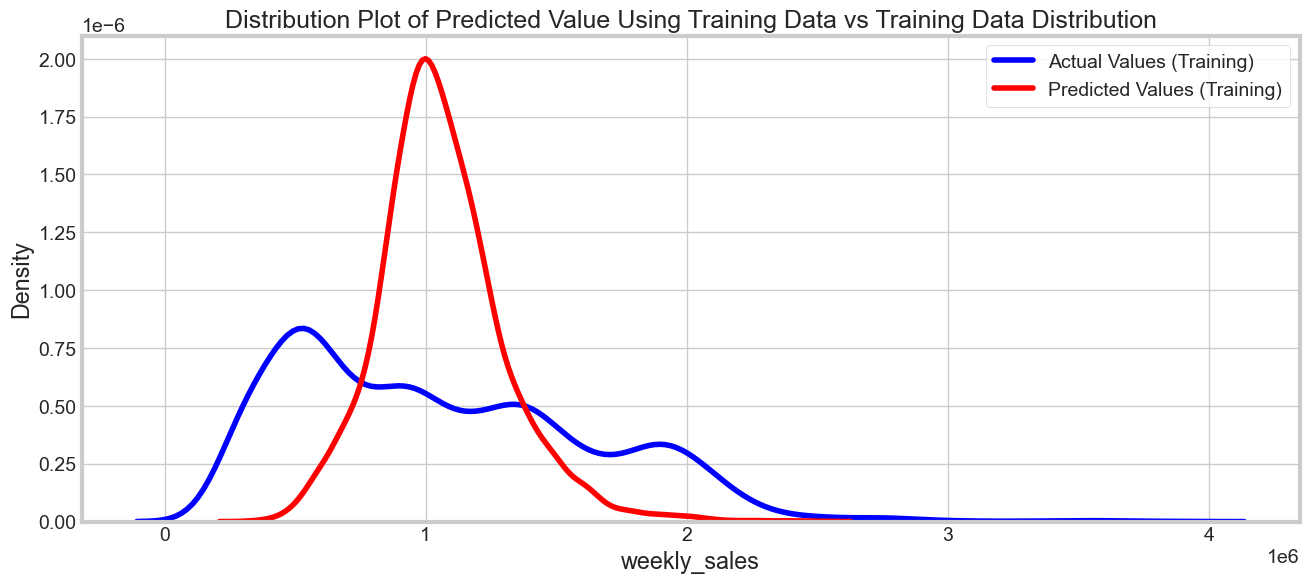

In [67]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Best_KNN, 'Training', X_train_transformed, y_train, Title)

**Conclusion:**
- After tuning the hyperparameter of n_neighbors, The model seems to have improved a little in learning from the training dataset.

### 2.5. Cross Validation Score

In [68]:
cross_validation_score(Best_KNN, X_train_transformed, y_train, n = 10)

Cross Validation Scores: [0.38489893 0.28632911 0.36214713 0.36376533 0.32871036 0.37735874
 0.37026511 0.32176991 0.34815196 0.34017606] 

Mean of Scores: 34.84 % 

Standard Deviation of Scores: 0.028445132639218846


### 2.6. Testing The Model

In [69]:
# Testing Accuracy
model_evaluation(Best_KNN, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 451886.54
-> R-Squere score Training: 36.69 % 



</h4>Let's examine the distribution of the predicted values of the test data.</h4>

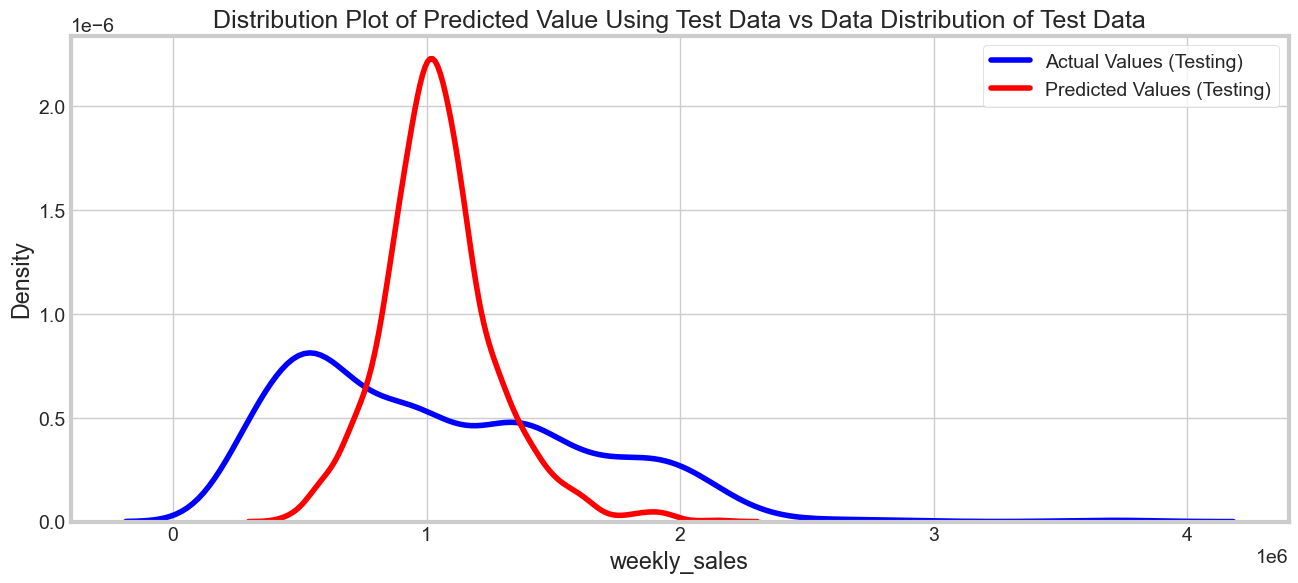

In [70]:
# Figure 3: Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(Best_KNN, 'Testing', X_test_transformed, y_test, Title)

**Conclusion:**
- After testing the KNN Regressor model, it became clear that it is a bad model with an accuracy of 45.37 % in comparison to the above algorithm we used (Linear Regression).

## 3. Decision Tree Regressor

### 3.1. Creating The Model

In [71]:
# Decision Tree regressor Model
tree = DecisionTreeRegressor()

# Fitting the training data
tree.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

### 3.2. Evaluating The Model (Training)

In [72]:
# Training Accuracy
model_evaluation(tree, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 0.0
-> R-Squere score Training: 100.0 % 



<b4>Let's examine the distribution of the predicted values of the training data<b4>

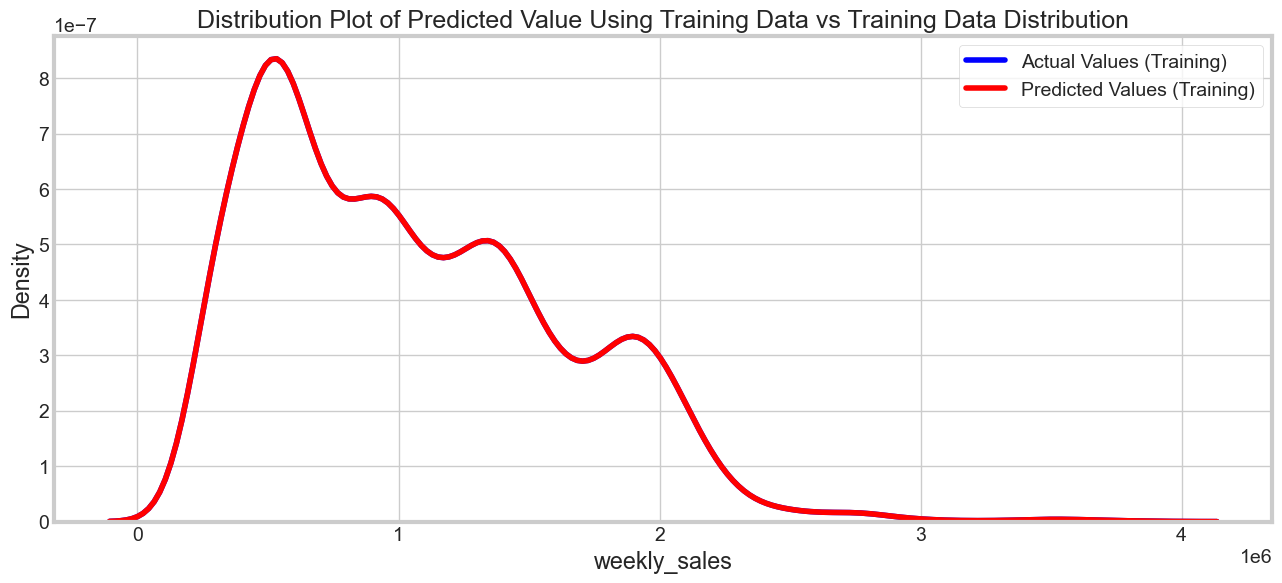

In [73]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(tree, 'Training', X_train_transformed, y_train, Title)

**Conclusion:**

- The model has overfitting, so let's improve it by tuning the hyperparameters..

### 3.3. Tuning The Model

In [74]:
# Define the parameter grid to search
param_grid = {'max_depth': np.arange(2, 15),
              'min_samples_split': [10, 20, 30, 40, 50, 100, 200, 300]}

best_estimator = hyperparameter_tunning(tree, X_train_transformed, y_train, param_grid, score = 'r2', n = 5)

Best_Tree = best_estimator

Best parameters: {'max_depth': 8, 'min_samples_split': 20} 

Best score: 0.9194820395966836


### 3.4. Evaluating The Model After Tuning

In [75]:
# Training Accuracy Afer tuning
model_evaluation(Best_Tree, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 130425.76
-> R-Squere score Training: 94.81 % 



<b4>Let's examine the distribution of the predicted values of the training data after tuning<b4>

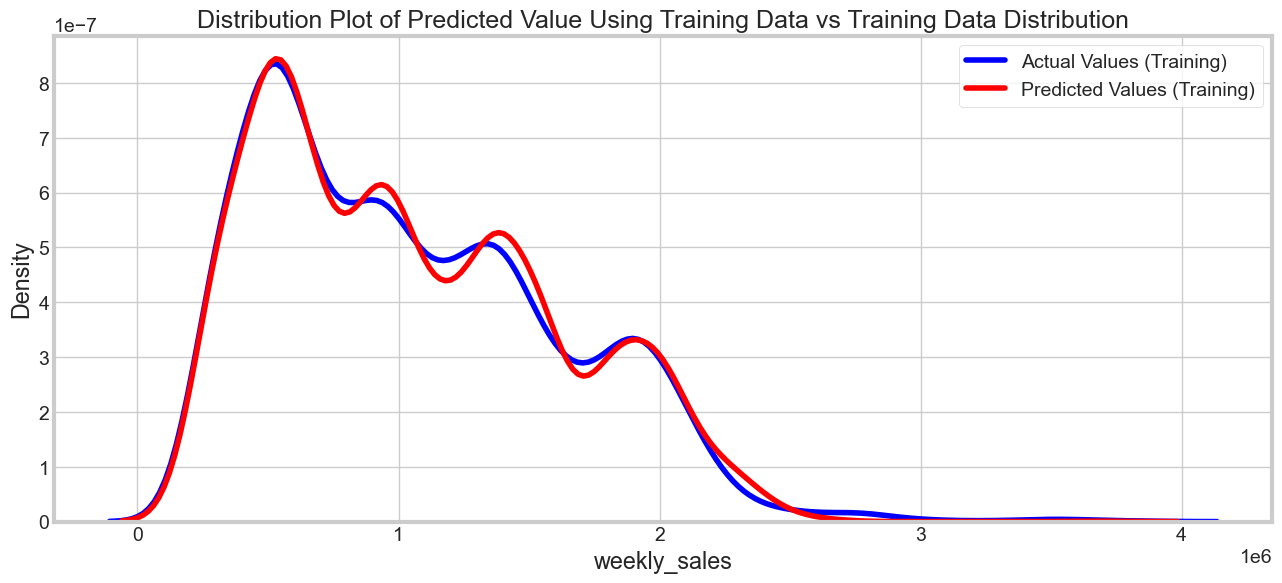

In [76]:
# Figure 2: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(Best_Tree, 'Training', X_train_transformed, y_train, Title)

**Conclusion:**
- After tuning the hyperparameter of max_depth and min_samples_split, The model seems to have improved well in learning from the training dataset.

### 3.5. Cross Validation Score

In [77]:
cross_validation_score(Best_Tree, X_train_transformed, y_train, n = 10)

Cross Validation Scores: [0.91849129 0.93463672 0.83420046 0.89832905 0.9341999  0.85153127
 0.89769836 0.92810069 0.91827813 0.91316815] 

Mean of Scores: 90.29 % 

Standard Deviation of Scores: 0.03257805776576154


### 3.6. Testing The Model

In [78]:
# Testing Accuracy
model_evaluation(Best_Tree, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 145422.76
-> R-Squere score Training: 93.44 % 



</h4>Let's examine the distribution of the predicted values of the test data.</h4>

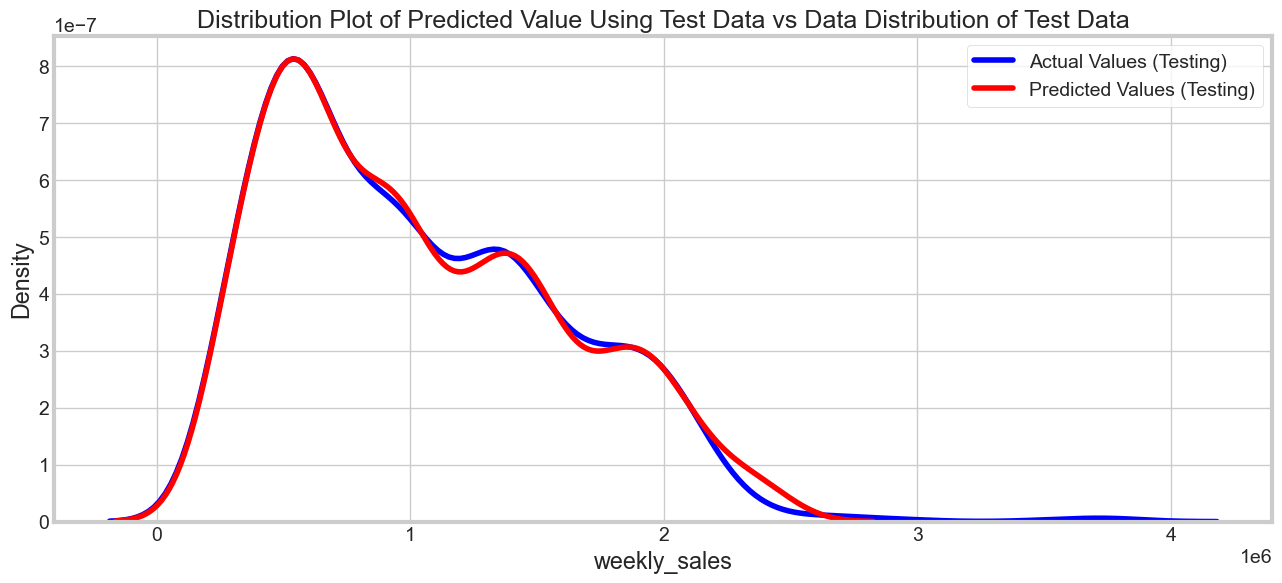

In [79]:
# Figure 3: Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(Best_Tree, 'Testing', X_test_transformed, y_test, Title)

**Conclusion:**
- After testing the Decision Tree Regressor model, it became clear that it is the best model with an accuracy of 92.94 % compared to the above algorithms we used (KNN).

## 4. Random Forest Regressor (Bagging)

### 4.1. Creating The Model

In [80]:
# Random Forest regressor Model
rf = RandomForestRegressor()

# Fitting the training data
rf.fit(X_train_transformed, y_train)

RandomForestRegressor()

### 4.2. Evaluating The Model (Training)

In [81]:
# Training Accuracy
model_evaluation(rf, 'Training', X_train_transformed, y_train)

Training Accuracy: 

-> Root Mean Squared Error: 51829.41
-> R-Squere score Training: 99.18 % 



<b4>Let's examine the distribution of the predicted values of the training data<b4>

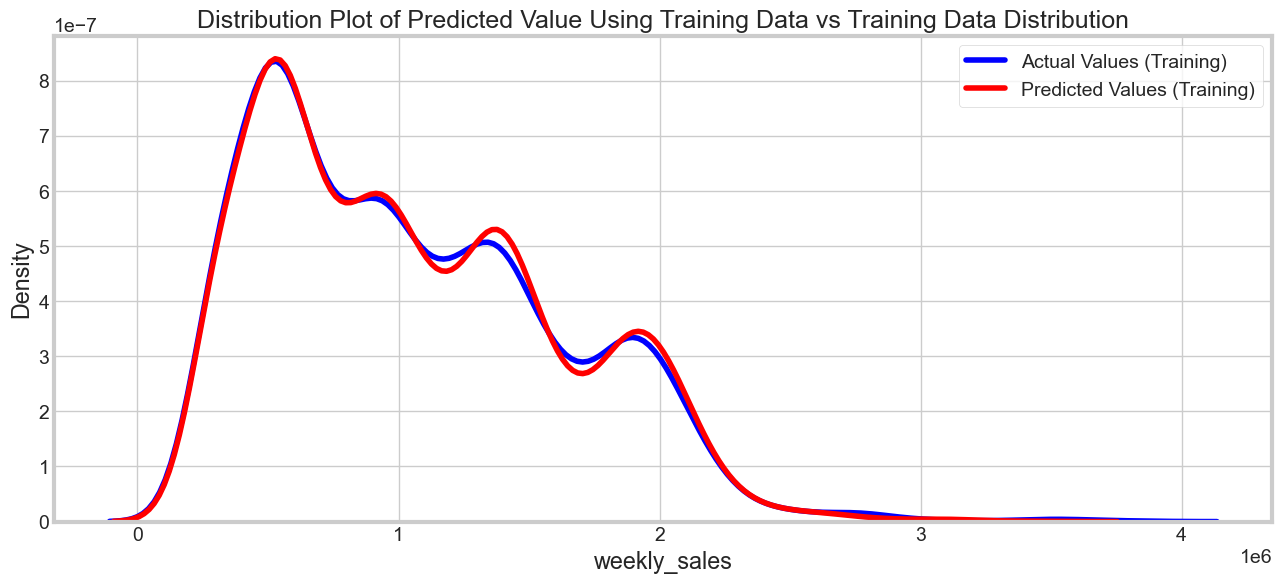

In [82]:
# Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
Distribution_Plot(rf, 'Training', X_train_transformed, y_train, Title)

**Conclusion:**

- Has the model been overfitted?! let's be sure of that by doing a cross-validation score.

### 4.3. Cross Validation Score

In [83]:
cross_validation_score(rf, X_train_transformed, y_train, n = 10)

Cross Validation Scores: [0.94464163 0.95521323 0.90835968 0.93010494 0.95351972 0.92690443
 0.93053725 0.9434408  0.94319561 0.9335815 ] 

Mean of Scores: 93.69 % 

Standard Deviation of Scores: 0.013289262292080904


**Conclusion:**

- After doing a cross-validation score, we see the model has trained very well.

### 4.4. Testing The Model

In [84]:
# Testing Accuracy
model_evaluation(rf, 'Testing', X_test_transformed, y_test)

Testing Accuracy: 

-> Root Mean Squared Error: 131456.53
-> R-Squere score Training: 94.64 % 



</h4>Let's examine the distribution of the predicted values of the test data.</h4>

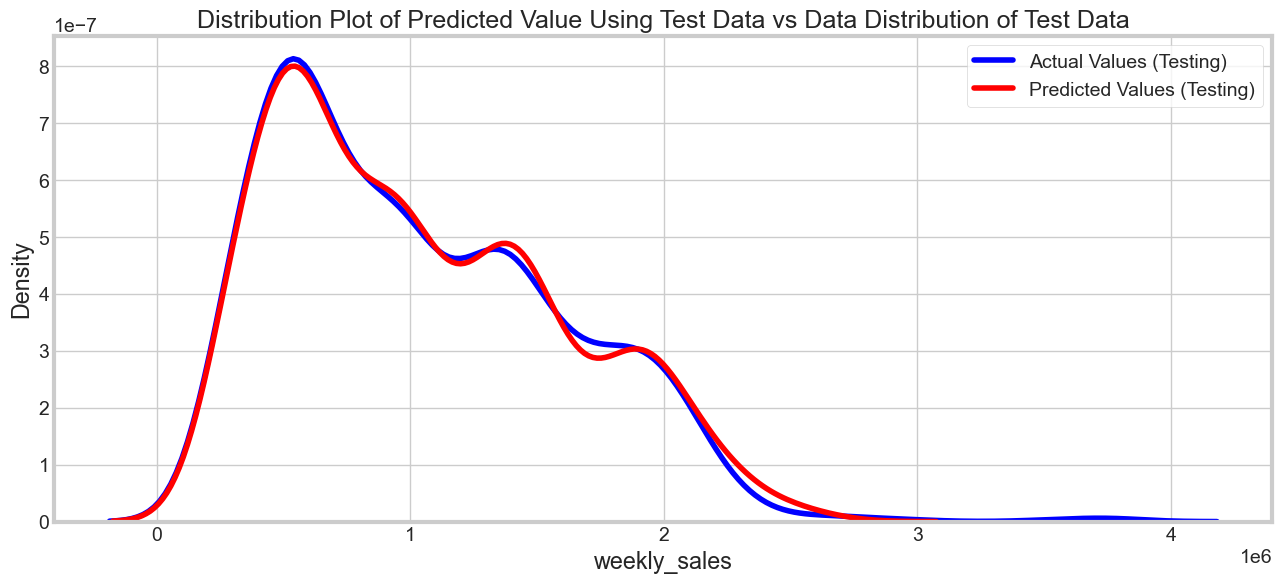

In [85]:
# Figure 3: Plot of predicted value using the test data compared to the actual values of the test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
Distribution_Plot(rf, 'Testing', X_test_transformed, y_test, Title)

**Conclusion:**

- After testing the Random Forest Regressor model, it became clear that it is the best model with an accuracy of 94.76 % compared to the above algorithms we used (e.g. KNN, and Decision Tree Regressor).

---

<h1>Decision Making: Determining a Good Model Fit</h1>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Linear Regression:
<ul>
    <li>R-squared: 96.84 %</li>
    <li>RMSE: 101730.35</li>
</ul>
</p>

<p>KNN Regressor:
<ul>
    <li>R-squared: 45.37 %</li>
    <li>RMSE: 422689.74</li>
</ul>
</p>

<p>Decision Tree Regressor:
<ul>
    <li>R-squared: 92.94 %</li>
    <li>RMSE: 151915.04</li>
</ul>
</p>

<p>Random Forest Regressor:
<ul>
    <li>R-squared: 94.76 %</li>
    <li>RMSE: 130846.43</li>
</ul>
</p>


<h1>Conclusions</h1>

- <p>Sales tend to be higher in Summer.</p>

- <p>The rate of sales on holidays is higher than on other days.</p>

- <p>There is a high variance in weekly sales from one store to another.</p>

- <p>Sales are affected by the unemployment rate, so the higher the unemployment rate, the lower the sales.</p>

- <p>Comparing these four models, we conclude that <b>The Linear Regression Model</b> is the best model with an accuracy of  96.84 % to be able to predict weekly sales from our dataset.</p>


---